# Project-FRA503 Machine Learning

สมาชิกทีม 

1. นายก้องภพ ทองดี 63340500003
2. นายธนัท บำรุงวงศ์สิริ 63340500026
3. นายภรภัทร พัชรพิมพ์พิสุทธิ์ 63340500046

### 1. Data Exploration

Dataset ที่นำมาวิเคราะห์มาจาก https://www.kaggle.com/datasets/arjunbhasin2013/ccdata (Credit_Card_Dataset_for_Clustering)

โดย dataset นี้ประกอบด้วย 8950 instances, 18 input feature ซึ่งเป้าหมายคือการ clustering แบ่งกลุ่มลูกค้าเพื่อกำหนดกลยุทธ์ทางการตลาดในช่วงระยะเวลา 6 เดือนที่ผ่านมา

สำหรับ Project กลุ่มเราได้ทำ model เกี่ยวกับ unsupervised learning จึงไม่มี output attribute ใน dataset จากนั้นเราจึงนำไปใช้ในการ clustering โดยมีขั้นตอนการทำดังนี้ 
1. data exploration 
2. data preprocessing 
3. clustering 

โดยมีเป้าหมายคือการหาพฤติกรรมของกลุ่มลูกค้าว่าส่วนใหญ่ลูกค้าใช้จ่ายแบบใดบ้าง ซึ่งจะมีการนำผลลัพธ์ที่ได้ไปทดลองเปรียบเทียบกับ Benchmark ด้วย เพื่อวิเคราะห์ว่ากลุ่มลูกค้าที่ใช้จ่ายแตกต่างกันในระยะเวลา 6 เดือนที่ผ่านมา จะมีแนวโน้มในการการกำหนดกลยุทธ์ทางการตลาดอย่างไรได้บ้าง

**ขั้นตอนการทำ data exploration**

1. Read data
2. Separate categorical data and numeric data
3. Find the missing value
4. Virtualize and analyze data
5. Find outlier

#### **1.1 Read data**

Import pandas และ Library อื่นๆ ที่จำเป็นในการใช้งานและใช้ read_csv() เพื่ออ่าน dataset จากไฟล์ CC GENERAL.csv 

In [49]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

df = pd.read_csv('CC_GENERAL.csv', header=0)
sns.set(style="darkgrid")

ใช้ head() เพื่อแสดง dataframe ที่อ่านได้

In [50]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

ใช้ describe() เพื่อแสดง ค่า mean,min,max และค่าที่อยู่ในช่วงต่างๆ(25%,50% และ 75%) ที่อ่านได้

In [51]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [52]:
df.shape

(8950, 18)

#### **1.2 Separate categorical data and numeric data**

จากการ read data พบว่า feature ของ dataset สามารถแบ่งได้เป็น 2 ประเภท คือ numeric data และ categorical data ซึ่ง numeric data และ categorical data มีลักษณะของข้อมูลและการวิเคราะห์ที่แตกต่างกัน จึงทำการแยกข้อมูลเป็น 2 ส่วน ก่อนทำ data exploration

โดยใช้ select_dtypes เลือกเฉพาะ DataType object เป็น categorical feature และเลือก DataType int64 และ float64 เป็น numeric feature

**Categorical feature**

Categorical feature หรือข้อมูลที่ไม่ใช่ตัวเลข ประกอบด้วย 1 feature ดังนี้

1. CUST_ID: ระบุ ID ของผู้ถือบัตร

**Numeric feature**

Numeric feature หรือข้อมูลที่ใช่ตัวเลข ประกอบด้วย 17 feature ดังนี้

1. BALANCE: ยอดเงินคงเหลือในบัญชีเพื่อทำการซื้อ
2. BALANCEFREQUENCY: ยอดเงินมีการ update ในบัญชีบ่อยขนาดไหน(ถ้าเป็น 1 = จะมีการ update บ่อย,ถ้าเป็น 0 = จะมีการ update น้อย)
3. PURCHASES: จำนวนเงินการซื้อจากบัญชีนี้
4. ONEOFFPURCHASES: จำนวนเงินการซื้อมากที่สุดในครั้งเดียว
5. INSTALLMENTSPURCHASES: จำนวนเงินในการซื้อผ่อนชำระ
6. CASHADVANCE: เงินสดล่วงหน้าที่มอบให้ user
7. PURCHASESFREQUENCY: ความถี่ในการซื้อ(ถ้าเป็น 1 = จะมีการซื้อบ่อย,ถ้าเป็น 0 = จะมีการซื้อน้อย)
8. ONEOFFPURCHASESFREQUENCY: ความถี่ในการซื้อที่เกิดขึ้นในครั้งเดียว(ถ้าเป็น 1 = จะมีการซื้อบ่อย,ถ้าเป็น 0 = จะมีการซื้อน้อย)
9. PURCHASESINSTALLMENTSFREQUENCY: มีการซื้อแบบผ่อนชำระบ่อยเพียงใด(1 = จะมีการซื้อบ่อย, 0 = จะมีการซื้อไม่บ่อย)
10. CASHADVANCEFREQUENCY: ความถี่ในการจ่ายเงินสดล่วงหน้า
11. CASHADVANCETRX: จำนวนธุรกรรมที่ทำด้วย "Cash in Advanced"
12. PURCHASESTRX: จำนวนธุรกรรมการซื้อที่ทำ
13. CREDITLIMIT: วงเงินบัตรเครดิตสำหรับผู้ใช้
14. PAYMENTS: จำนวนเงินที่ผู้ใช้ชำระ
15. MINIMUM_PAYMENTS: จำนวนเงินขั้นต่ำของการชำระเงินโดยผู้ใช้
16. PRCFULLPAYMENT: เปอร์เซ็นต์ของการชำระเงินเต็มจำนวนโดยผู้ใช้
17. TENURE: ระยะเวลาการให้บริการบัตรเครดิตสำหรับผู้ใช้

In [53]:
categorical_feature = list(df.select_dtypes('object').columns)
numeric_feature = list(df.select_dtypes(['int64','float64']).columns)

print("Categorical Features : " + str(len(categorical_feature)) + "\nNumerical Features   : " + str(len(numeric_feature)) + "\n=================")
df.info()

Categorical Features : 1
Numerical Features   : 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX  

จากการวิเคราะห์คาดว่า CUST_ID ไม่ส่งผลกับการแบ่งกลุ่มลูกค้าเลย เพราะเป็นแค่ ID ของผู้ถือบัตรเท่านั้น ไม่ได้เป็นข้อมูลส่วนลึกที่เกี่ยวกับลูกค้า ดังนั้นสามารถเลือกตัด feature นี้ได้

In [54]:
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

#### **1.3 Find missing value**

ทำการหา missing value ใน dataset เนื่องจาก missing value ส่งผลกับการนำข้อมูลไปทำ clustering ดังนั้นจึงควรที่จัดการ missing value ก่อนนำข้อมูลไปใช้ 

โดยใช้ isnull() และ sum() ในการหาจำนวนของ missing value ในแต่ละ feature ซึ่งจากการทำพบว่า dataset นี้มี missing value ดังนี้

In [55]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

ทำการ plot graph displot ของทั้ง 2 feature คือ 

1. MINIMUM_PAYMENTS 
2. CREDIT_LIMIT 

ที่มี missing value โดยจะนำไปพิจารณาวิธีการจัดการกับ missing value นี้

<Figure size 640x480 with 0 Axes>

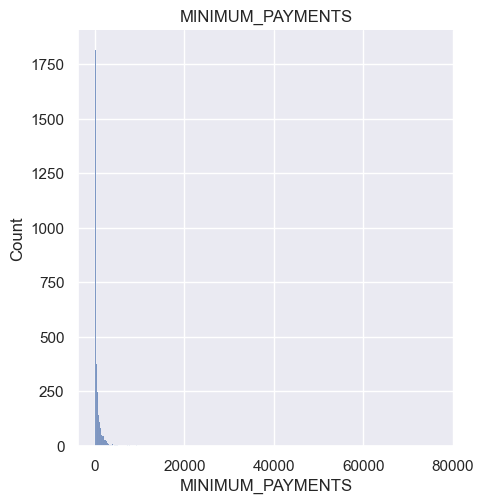

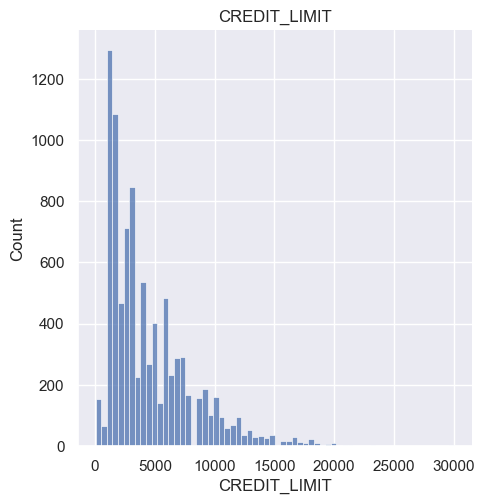

In [56]:
fig = plt.figure()
sns.displot(df['MINIMUM_PAYMENTS']).set(title="MINIMUM_PAYMENTS")
sns.displot(df['CREDIT_LIMIT']).set(title="CREDIT_LIMIT")
plt.show()

จากการ plot graph displot พิจารณาได้ดังนี้
1. เนื่องจากค่าส่วนใหญ่ใน instances ของ MINIMUM_PAYMENTS เป็นค่า 0 เพราะฉะนั้นสามารถแปลงค่า missing value ของ instances นี้ให้เกาะกลุ่มส่วนใหญ่โดยกำหนดให้เป็นค่า 0
2. เนื่องจากเราต้องการข้อมูลของทุก instances ไปพิจารณาต่อเพราะฉะนั้นจึงไม่ต้องการตัด instances ไหนออกไปเลย จึงทำการแทนค่า missing value ของ CREDIT_LIMIT feature ทั้งหมดด้วยค่า median ของข้อมูลทั้งหมด

1. เนื่องจากค่าส่วนใหญ่ใน instances ของ MINIMUM_PAYMENTS เป็นค่า 0 เพราะฉะนั้นสามารถแปลงค่า missing value ของ instances นี้ให้เกาะกลุ่มส่วนใหญ่โดยกำหนดให้เป็นค่า 0
2. เนื่องจากเราต้องการข้อมูลของทุก instances ไปพิจารณาต่อเพราะฉะนั้นจึงไม่ต้องการตัด instances ไหนออกไปเลย จึงทำการแทนค่า missing value ของ CREDIT_LIMIT feature ทั้งหมดด้วยค่า median ของข้อมูลทั้งหมด

In [57]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']= 0
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].median()

ทำการเช็คยืนยัน missing value ใน dataset นี้อีกรอบก่อนนำข้อมูลไปใช้

In [58]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### **1.4 Visualize and analyze data**

จากนั้นทำการวิเคราะห์ numeric feature โดยสังเกตการกระจายตัว ช่วงของข้อมูล และความสัมพันธ์ระหว่าง feature โดยใช้ hisplot(), heatmap() และ pairplot() ในการ plot numeric feature ในรูปแบบต่าง ๆ รวมถึงสังเกต outlier โดยใช้ขอบเขตของ quantile ที่ 1 และ 3

**ความสัมพันธ์และการจัดกลุ่มของข้อมูล**

ใช้ heatmap() เพื่อดู correlation ระหว่าง feature ซึ่งการที่ correlation ระหว่าง feature มาก แปลว่า 2 features นี้มีลักษณะคล้ายคลึงกัน ในการทำ feature selection อาจเลือกใช้เพียง 1 feature หรือทำ feature extraction เพื่อลด dimension ของข้อมูล แต่ต้องสังเกตก่อนว่าความสัมพันธ์ของ feature ส่งผลต่อการจัดกลุ่มหรือไม่ ถ้าส่งผลควรเก็บ feature เหล่านั้นไว้ เนื่องจากจะส่งผลดีกับการทำ clustering

โดยจากการ plot พบว่าจะพิจารณา feature selection จากความสัมพันธ์ >= 0.5 โดยจะมีดังนี้

1. BALANCE,CASHADVANCE 0.5
2. BALANCE,CREDITLIMIT 0.5
3. PURCHASES,ONEOFFPURCHASES 0.9
4. PURCHASES,INSTALLMENTSPURCHASES 0.7
5. PURCHASES,ONEOFFPURCHASESFREQUENCY 0.5
6. PURCHASES,PURCHASESTRX 0.7
7. PURCHASES,PAYMENTS 0.6
8. ONEOFFPURCHASES,ONEOFFPURCHASESFREQUENCY 0.5
9. ONEOFFPURCHASES,PURCHASESTRX 0.5
10. ONEOFFPURCHASES,PAYMENTS 0.6
11. INSTALLMENTSPURCHASES,PURCHASESINSTALLMENTSFREQUENCY 0.5
12. INSTALLMENTSPURCHASES,PURCHASESTRX 0.6
13. CASHADVANCE,CASHADVANCEFREQUENCY 0.6
14. CASHADVANCE,CASHADVANCETRX 0.7
15. CASHADVANCE,PAYMENTS 0.5
16. PURCHASESFREQUENCY,ONEOFFPURCHASESFREQUENCY 0.5
17. PURCHASESFREQUENCY,PURCHASESINSTALLMENTSFREQUENCY 0.9
18. PURCHASESFREQUENCY,PURCHASESTRX 0.6
19. ONEOFFPURCHASESFREQUENCY,PURCHASESTRX 0.5
20. PURCHASESINSTALLMENTSFREQUENCY,PURCHASESTRX 0.5

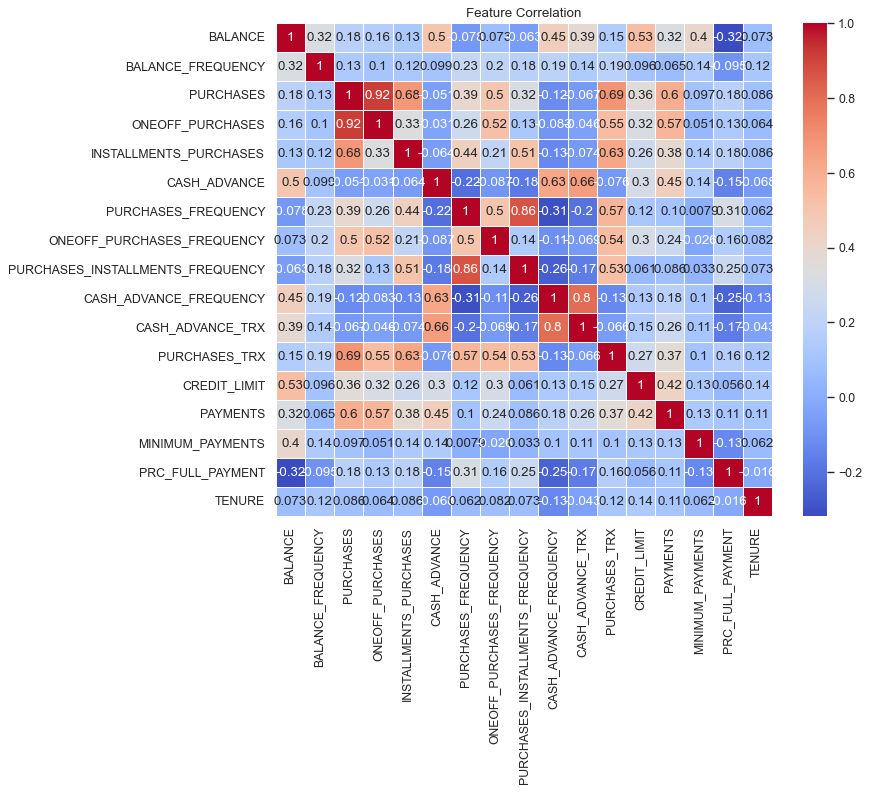

In [59]:
plt.figure(figsize=(10,8),dpi=80)
df2 = df.copy()
plt.title('Feature Correlation')
sns.heatmap(df2.corr(),cmap="coolwarm",annot=True,linewidth=0.5)
plt.show()
del df2

จากนั้นใช้ pairplot() เพื่อดูว่าความสัมพันธ์ของ feature ที่มี correlation สูง ทำให้เห็นถึงการจัดกลุ่มของข้อมูลหรือไม่

โดยหลังจากการใช้ pairplot() ทำให้เห็นลักษณะพฤติกรรมได้ดังนี้ 

1. ความสัมพันธ์ของ BALANCE กับ CASHADVANCE กระจุกอยู่ในช่วงต้นของกราฟ ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้ และยังได้พฤติกรรมอีกอย่างคือ ถ้าเงินสดในบัญชีหลือน้อยเงินสดล่วงหน้าที่มอบให้กับ user ก็จะน้อยตามไปด้วย
2. ความสัมพันธ์ของ BALANCE กับ CREDITLIMIT ไปในทางเดียวกัน ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ ยอดเงินคงเหลือในบัญชีเหลือน้อยวงเงินบัตรที่ใช้ได้ก็จะน้อยแต่ถ้าวงเงินบัตรในบัญชีเหลือเยอะก็จะสามารถใช้ได้เยอะ
3. ความสัมพันธ์ของ PURCHASES กับ ONEOFFPURCHASES กระจุกอยู่ในช่วงต้นของกราฟ ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ ยิ่งราคาของแพงมากขึ้นจำนวนในการซื้อของสิ่งนั้นก็จะน้อยตามไปด้วย
4. ความสัมพันธ์ของ PURCHASES กับ INSTALLMENTSPURCHASES กระจุกอยู่ในช่วงต้นของกราฟ ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ คนจะเลือกซื้อของในราคาถูกและก็ผ่อนอยู่ดีจะไม่ค่อยมีใครอยากซื้อของแพง
5. ความสัมพันธ์ของ PURCHASES กับ ONEOFFPURCHASESFREQUENCY ข้อมูลมีการกระจายตัวความถี่เท่ากัน ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ จำนวนในการใช้จ่ายของ 1 ชิ้นที่ซื้อมาแล้วใช้ได้นานเลยโดยไม่จำเป็นต้องซื้ออีกรอบโดยราคาจะอยู่ที่ 10000-20000
6. ความสัมพันธ์ของ PURCHASES กับ PURCHASESTRX ข้อมูลมีการกระจุกอยู่ช่วงต้นแต่ก็มีกระจายออกไปบ้างบางส่วน ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ จำนวนการทำธุรกรรมการซื้อของจะซื้อไปในจำนวนน้อยเมื่อเทียบกับราคาที่ขึ้นหลักหมื่น โดยคนจะทำธุรกรรมเยอะในราคาที่น้อยกว่า 10000 
7. ความสัมพันธ์ของ PURCHASES กับ PAYMENTS ข้อมูลมีการกระจุกอยู่ช่วงต้นแต่ก็มีกระจายออกไปบ้างบางส่วน ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ จำนวนเงินในการผ่อนชำระของก็จะน้อยไปตามราคาที่ซื้อด้วยทำในจำนวนการซื้อของในช่วง 10000 มีมากแต่จำนวนของในช่วง 40000+ มีน้อย 
8. ความสัมพันธ์ของ ONEOFFPURCHASES กับ ONEOFFPURCHASESFREQUENCY ข้อมูลมีการกระจายตัวความถี่เท่ากันแต่ก็จะมีบางส่วนที่เป็น outlier ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ จำนวนคนซื้อในราคาที่ต่ำกว่า 10000 จะมีคนซื้อที่หลายรอบหรือซื้อครั้งเดียวทำให้รู้ว่าของเหล่านี้จำเป็นสำหรับการใช้ในชีวิตประจำวัน
9. ความสัมพันธ์ของ ONEOFFPURCHASES กับ PURCHASESTRX กระจุกอยู่ในช่วงต้นของกราฟ ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ จำนวนคนที่ทำธุระกรรมการซื้อน้อยครั้งในราคาที่ไม่เกิน 10000
10. ความสัมพันธ์ของ ONEOFFPURCHASES กับ PAYMENTS กระจุกอยู่ในช่วงต้นของกราฟ ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ จำนวนคนที่ซื้อของในราคาไม่เกิน 10000 และมีการชำระในราคาที่ต่ำเยอะ
11. ความสัมพันธ์ของ INSTALLMENTSPURCHASES กับ PURCHASESINSTALLMENTSFREQUENCY มีการกระจายตัวอยู่ความถี่ใกล้ๆ 1 ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ จำนวนส่วนใหญ่มีการผ่อนชำระที่เยอะกว่าการซื้อของรอบเดียว
12. ความสัมพันธ์ของ INSTALLMENTSPURCHASES กับ PURCHASESTRX กระจุกอยู่ในช่วงต้นของกราฟ ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ ยิ่งของที่ซื้อมีการผ่อนชำระที่น้อยจำนวนการทำธุรกรรมก็จะน้อยตามไปด้วย
13. ความสัมพันธ์ของ CASHADVANCE กับ CASHADVANCEFREQUENCY ข้อมูลมีการกระจายตัวความถี่ที่เท่ากัน ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ มีทั้งคนที่จ่ายเงินสดออกไปล่วงหน้าก่อนและก็มีคนที่มีเงินพอที่จะจ่ายผ่อนชำระหรือซื้อถายในครั้งเดียว
14. ความสัมพันธ์ของ CASHADVANCE กับ CASHADVANCETRX กระจุกอยู่ในช่วงต้นของกราฟ ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ มีคนที่ใช้เงินล่วงหน้าในการซื้อที่น้อย
15. ความสัมพันธ์ของ CASHADVANCE กับ PAYMENTS กระจุกอยู่ในช่วงต้นของกราฟ ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ จำนวนที่ทำการจ่ายล่วงหน้าออกไปยิ่งเยอะเท่าไหร่ก็ทำให้ดอกเบี้ยที่ต้องจ่ายก็เพิ่มมากขึ้นตาม แต่จำนวนที่เห็นนั้นมีคนที่จ่ายล่วงหน้าน้อยทำให้จำดอกเบี้ยเลยน้อยตามไปด้วย
16. ความสัมพันธ์ของ PURCHASESFREQUENCY กับ ONEOFFPURCHASESFREQUENCY จะเป็น 3 เหลี่ยมกลับหัว ซึ่งมีการทำให้เห็นการแบ่งกลุ่ม ดังนั้นสามารถเลือก feature นี้มาพิจารณาได้และยังได้พฤติกรรมอีกอย่างคือ ความถี่ในการซื้อที่เยอะความถี่ในการจ่ายครั้งเดียวก็จะน้อยตาม
17. ความสัมพันธ์ของ PURCHASESFREQUENCY กับ PURCHASESINSTALLMENTSFREQUENCY จะเป็น 3 เหลี่ยมกลับหัว ซึ่งมีการทำให้เห็นการแบ่งกลุ่ม ดังนั้นสามารถเลือก feature นี้มาพิจารณาได้และยังได้พฤติกรรมอีกอย่างคือ ความถี่ในการซื้อที่เยอะความถี่ในการผ่อนชำระก็จะน้อยตาม
18. ความสัมพันธ์ของ PURCHASESFREQUENCY กับ PURCHASESTRX ความถี่มีการกระจายในช่วงต้นที่มีธุระกรรมที่น้อย ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ ถึงจำนวนความถี่ในการซื้อจะมากน้อยเพียงใดแต่ธุรกรรมการซื้อก็ยังน้อยอยู่ดี
19. ความสัมพันธ์ของ ONEOFFPURCHASESFREQUENCY กับ PURCHASESTRX ความถี่มีการกระจายในช่วงต้นที่มีธุระกรรม ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ จำนวนความถี่ในการซื้อในราคาสูงมีผลทำให้การทำธุรกรรมที่เยอะขึ้น
20. ความสัมพันธ์ของ PURCHASESINSTALLMENTSFREQUENCY กับ PURCHASESTRX ความถี่มีการกระจายในช่วงต้นที่มีธุระกรรม ซึ่งไม่ทำให้เห็นการแบ่งกลุ่ม ดังนั้นอาจเลือกตัด feature ได้และยังได้พฤติกรรมอีกอย่างคือ จำนวนความถี่ในการผ่อนมีผลทำให้การทำธุรกรรมที่เยอะขึ้น

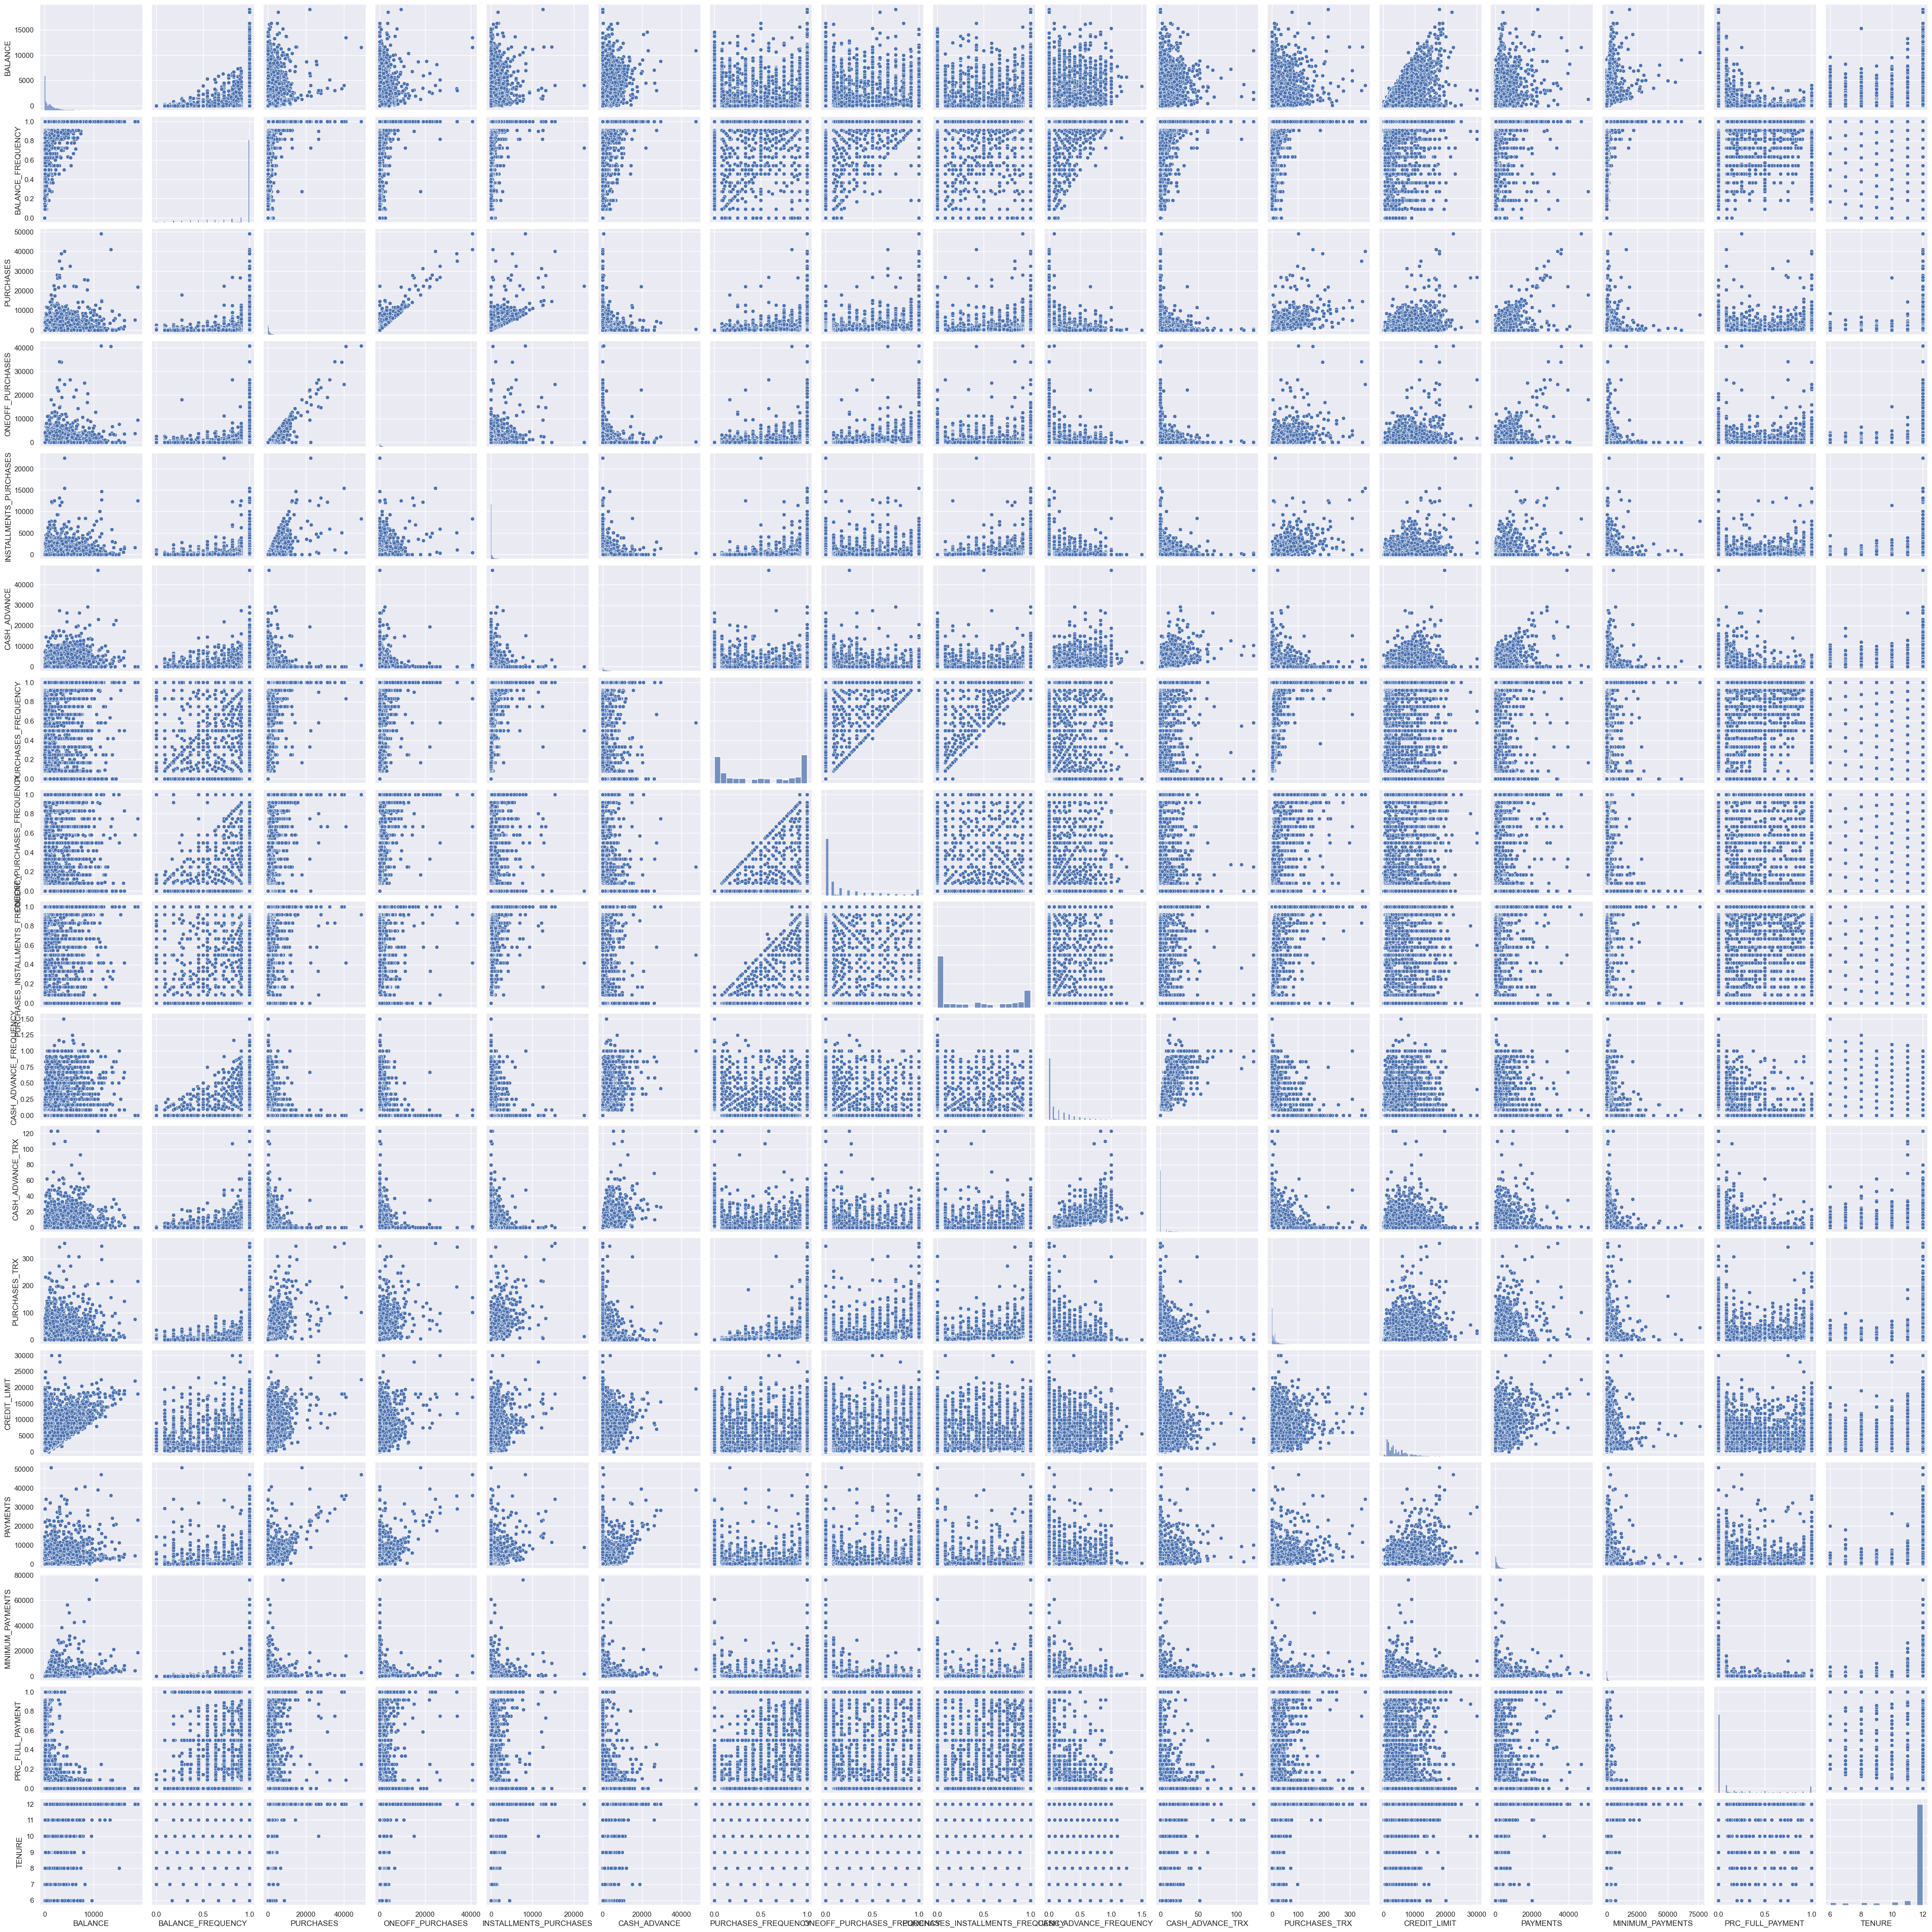

In [60]:
sns.pairplot(df)
plt.show()

**การกระจายตัวและช่วงของข้อมูล**

ใช้ histplot() ในการสังเกตการกระจายตัวและช่วงของข้อมูล เนื่องจากกระจายตัวและช่วงของข้อมูลส่งผลต่อการทำ clustering แต่ละ feature ควรมีมีลักษณะของข้อมูลที่ใกล้เคียงกัน เพื่อไม่ให้เกิดการลำเอียงต่อ feature

โดยจากการใช้ histplot() พบว่า 

1. feaure ทั้งหมดไม่มีการกระจายตัวแบบ normal distribution เลยส่วนใหญ่จะเป็น right-skewied distribution และมีบาง feature เป็น left-skewed distribution ดังนั้นก่อนนำข้อมูลในส่วนนี้ไปใช้ ควรจะทำการแก้ไขโดยปรับให้ข้อมูลให้มีการกระจายตัวแบบ normal distribution
2. แต่ละ feature มีช่วงของข้อมูลที่ต่างกัน ดังนั้นควร scale ให้ข้อมูลอยู่ในช่วงเดียวกัน 

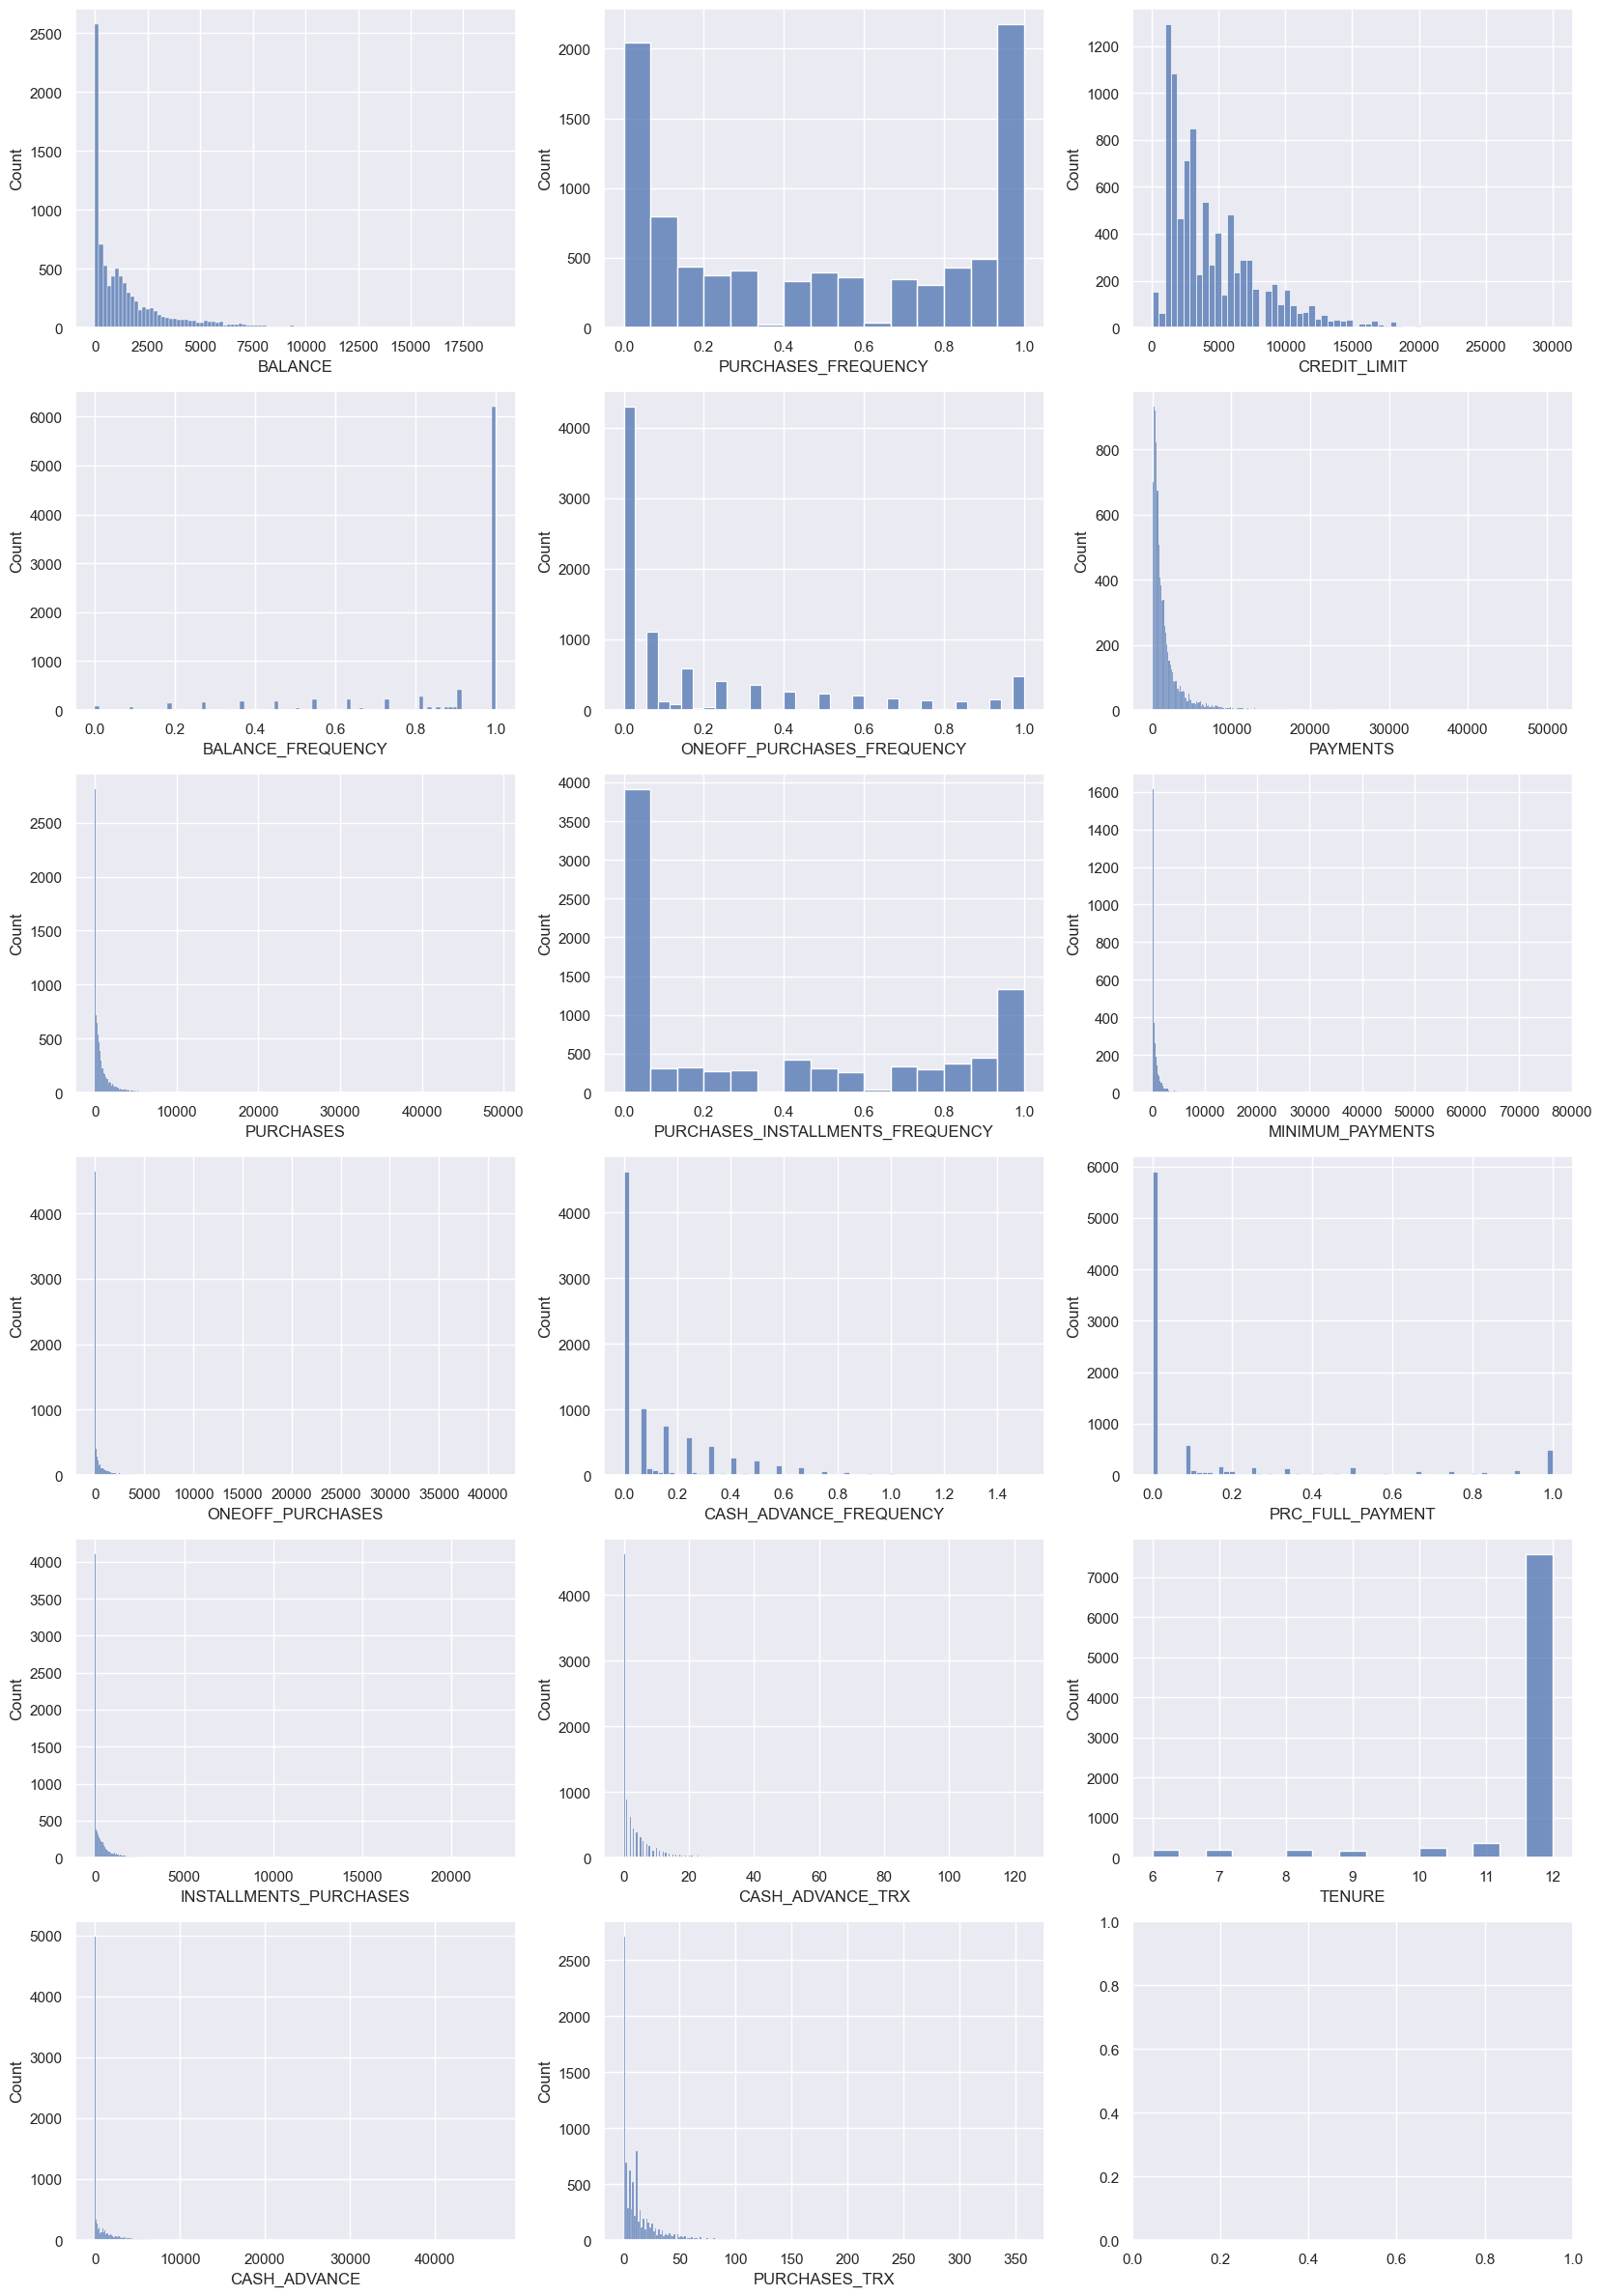

In [61]:
fig , axs = plt.subplots(6,3,figsize=(20,30))
for i in range(0,3):
    for j in range(0,6):
        if(((i*6)+j)==17):
            pass
        else:
            name = numeric_feature[(i*6)+j]
            sns.histplot(x=df[name],ax=axs[j,i])
plt.show()

จาก hisplot() สังเกตุได้ว่าจะมี feature บางตัวที่มีช่วงข้อมูล min และ max ที่ใกล้เคียงกัน ดังนั้นจึงจับข้อมูลที่ช่วงใกล้เคียงกันมาสร้าง columns แยกเพื่อนำไปพิจารณาต่อ โดยแต่ละ columns จะมีดังนี้

1. columns1 ประกอบไปด้วย BALANCE,CREDIT_LIMIT,PAYMENTS,PURCHASES,MINIMUM_PAYMENTS,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES และมีช่วงค่าอยู่ที่ 0-100000
2. columns2 ประกอบไปด้วย BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,PURCHASES_INSTALLMENTS_FREQUENCY และมีช่วงค่าอยู่ที่ 0-1
3. columns3 ประกอบไปด้วย PURCHASES_TRX,CASH_ADVANCE_TRX และมีช่วงค่าอยู่ที่ 0-1000

In [62]:
columns_group1 = ['BALANCE','CREDIT_LIMIT','PAYMENTS','PURCHASES','MINIMUM_PAYMENTS','INSTALLMENTS_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES']
columns_group2 = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT','PURCHASES_INSTALLMENTS_FREQUENCY']
columns_group3 = ['PURCHASES_TRX','CASH_ADVANCE_TRX']

#### **1.5 Find outlier**

ใช้ Box plot ทำการพล็อตเพื่อวิเคราะห์ว่า ข้อมูลมีการกระจายเป็นอย่างไร มีปริมาณ outlier มากน้อยแค่ไหน 

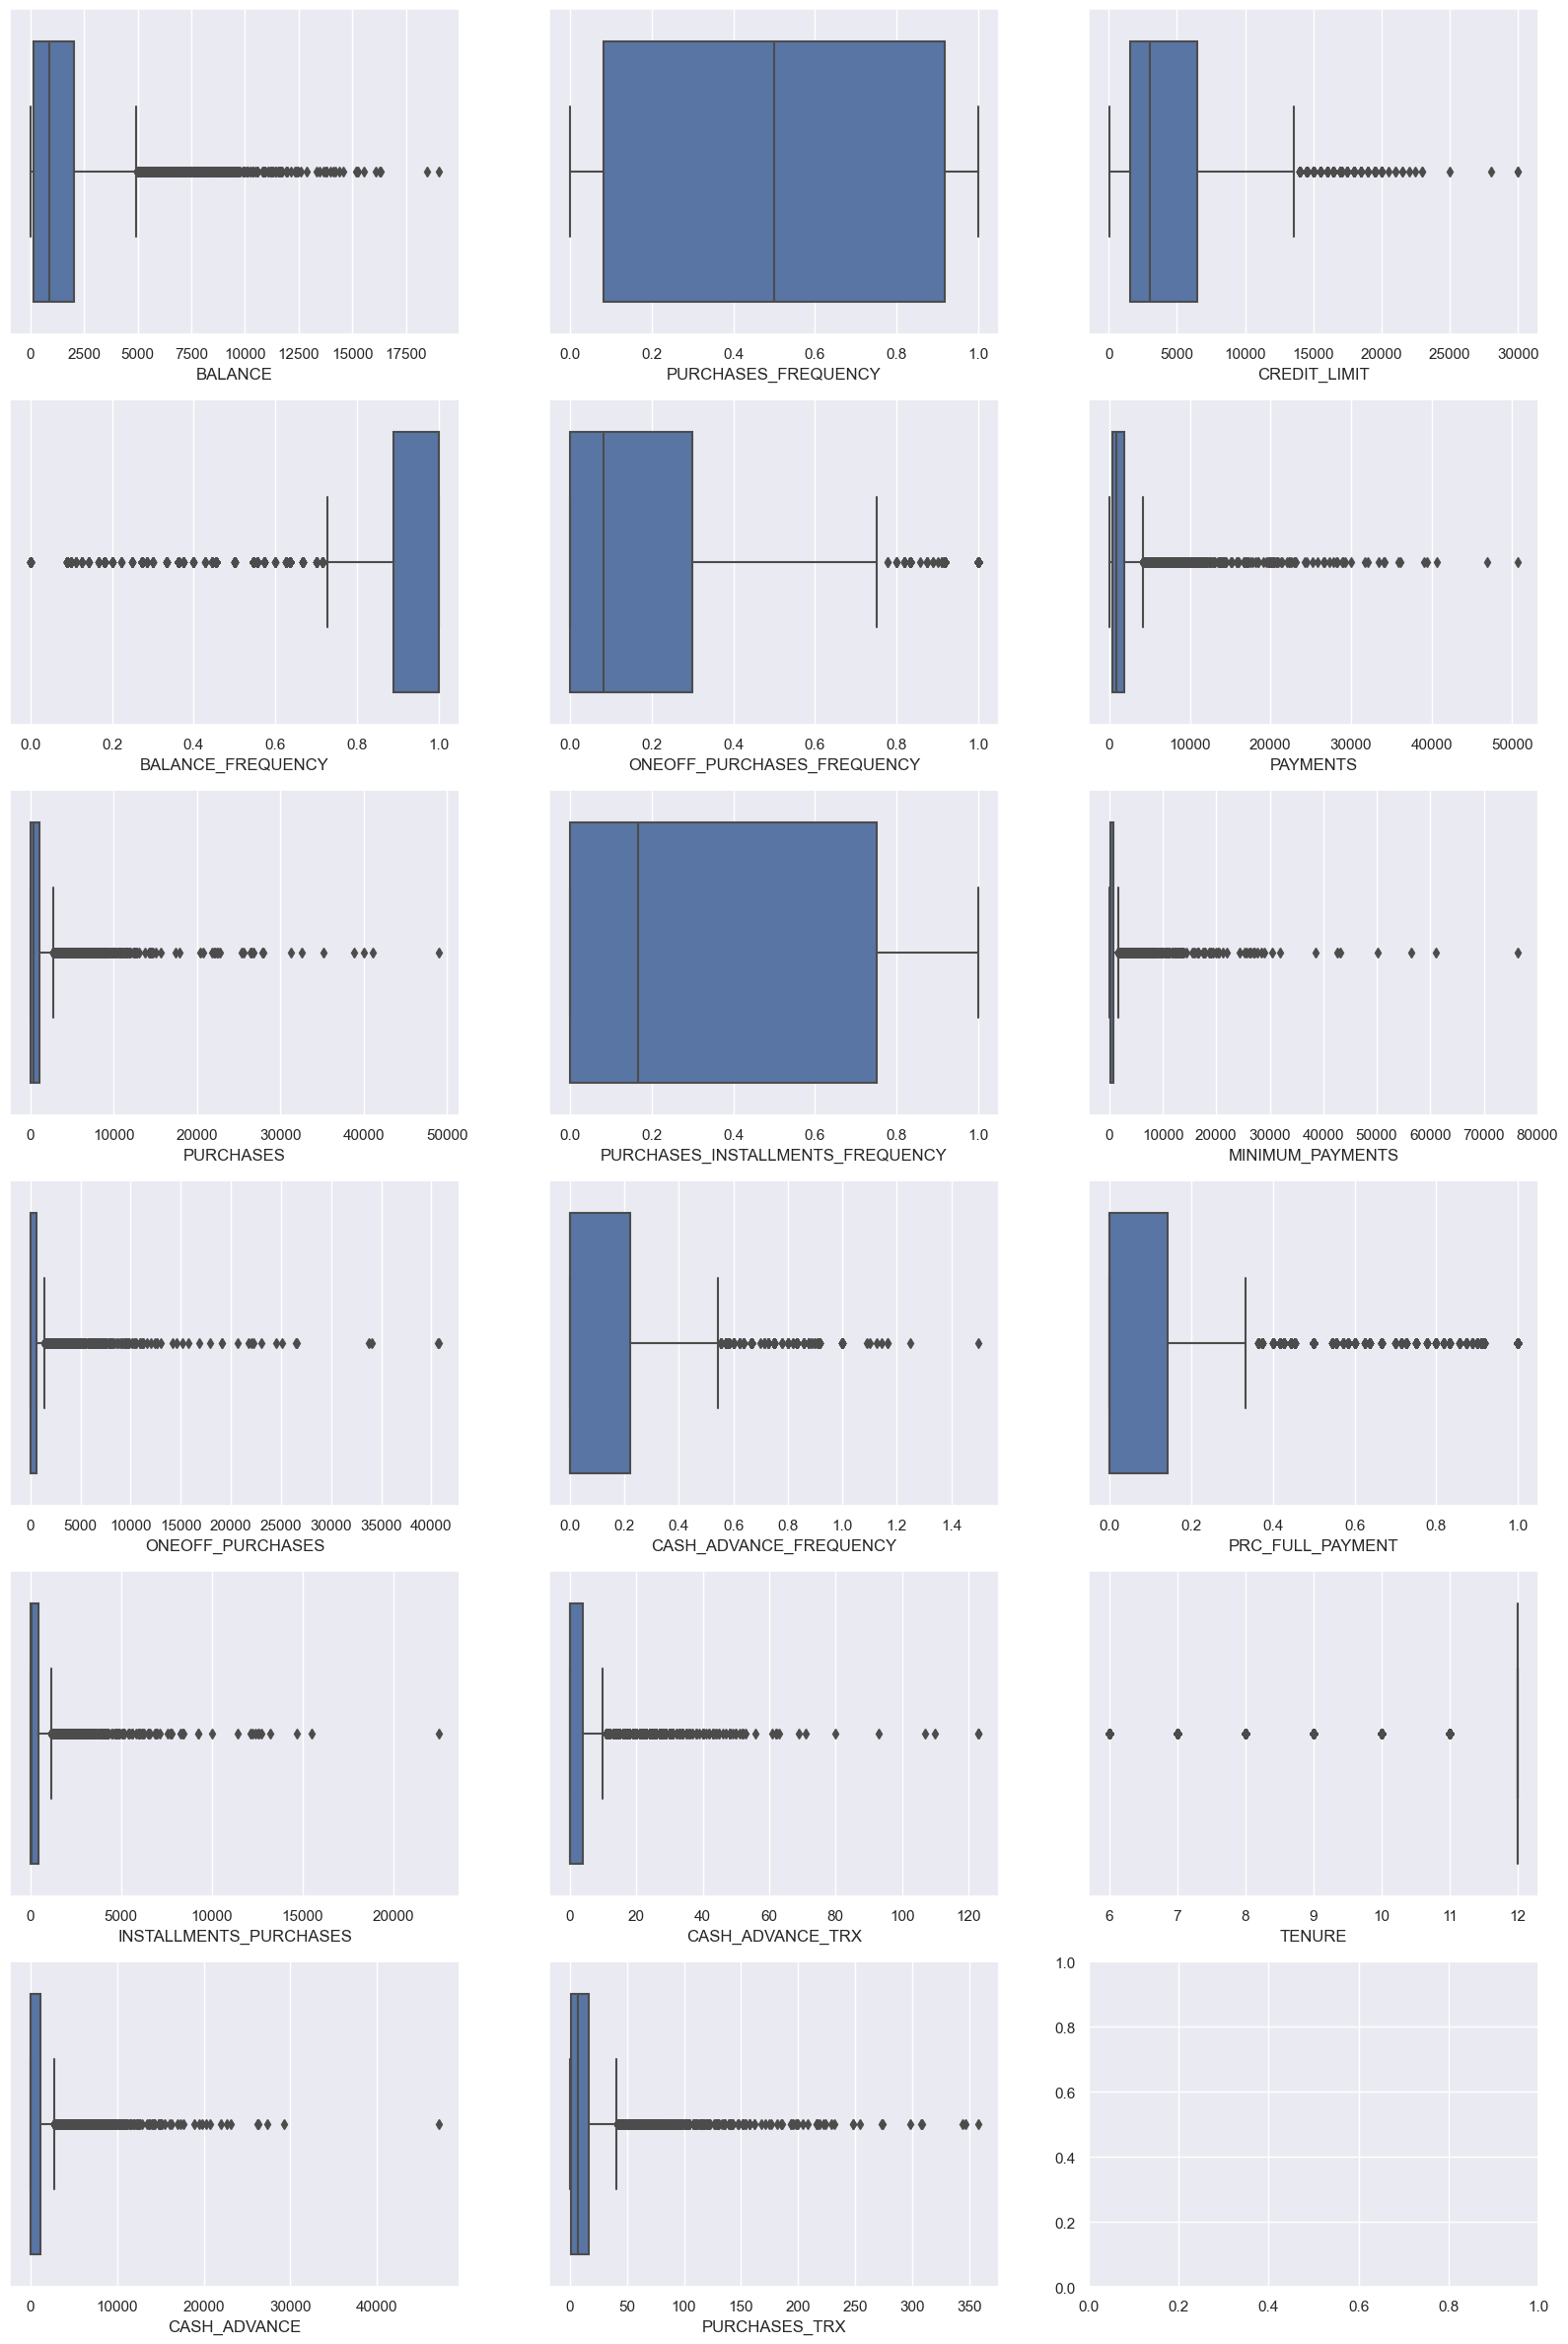

In [63]:
fig , axs = plt.subplots(6,3,figsize=(20,30))
for i in range(0,3):
    for j in range(0,6):
        if(((i*6)+j)==17):
            pass
        else:
            name = numeric_feature[(i*6)+j]
            sns.boxplot(x=df[name],ax=axs[j,i])
plt.show()

# Benchmark

สร้าง Benchmark ไว้สำหรับทดสอบการ clustering ของ dataset นี้ทำการแบ่งประเภทของ cluster ออกเป็นกี่ส่วน แล้วภายในการแบ่ง cluster นั้นสามารถสื่อข้อมูลอะไรออกออกมาได้บ้าง

ทำการสร้าง function ElbowGraph ไว้สำหรับเรียกใช้ในการหาค่า K ที่เหมาะสมสำหรับการแบ่ง cluster ของ model KMeans ตัวนี้และสร้าง function tuning_agglom เพื่อทำการหาค่า K ที่เหมาะสมสำหรับการแบ่ง cluster ของ model Agglom

In [64]:
from sklearn.cluster import KMeans,AgglomerativeClustering 
from sklearn.metrics import silhouette_score
def ElbowGraph(df):
    clusters = []
    for i in range(1, 25):
        km = KMeans(n_clusters=i).fit(df)
        df['Labels'] = km.labels_
        clusters.append(km.inertia_)
    df.drop(axis=1,inplace=True,columns="Labels")    
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=list(range(1,25)), y=clusters, ax=ax)
    ax.set_title('Searching for Elbow')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Inertia')
    plt.show()
    
def tuning_agglom(df):
    clusters=[3,4,5]
    linkage=['ward', 'complete', 'average']
    score = 0
    score_1 = 0
    for lin in linkage:
        for i in clusters:
            agglom = AgglomerativeClustering(n_clusters=i,linkage=lin).fit(df)
            score  =(silhouette_score(df, agglom.labels_))
            if score >= score_1:
                score_1 = score
                result = [lin,i,score]
    return result

**Find k**  

หาจำนวน cluster โดยจากกราฟพบว่า จุดที่มีการเปลี่ยนแปลงความชันจากมากไปน้อย คือ ตำแหน่งที่ k มีค่าเท่ากับ 6 จึงกำหนดให้มีทั้งหมด 6 cluster

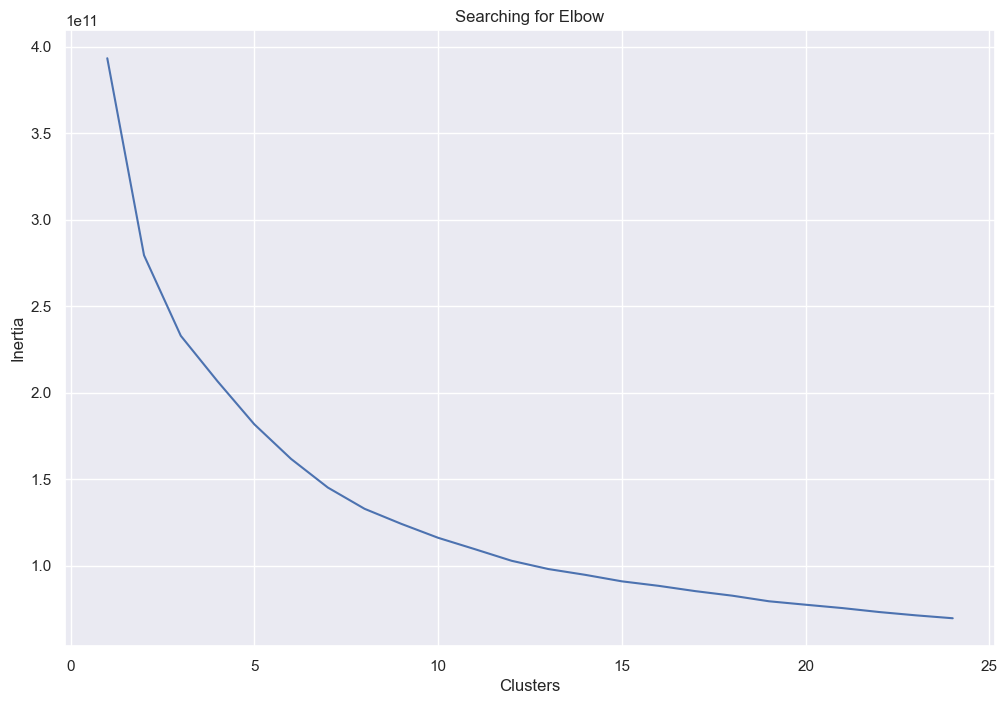

In [65]:
ElbowGraph(df)

**Find Silhoutte ของ KMeans** 

โดยได้เลือกค่า K = 6 ที่จะนำมาใช้ในตัว model KMeans และทำการคำนวนหา Silhoutte score สำหรับ clustering นี้

In [66]:
class_n = 6
km3 = KMeans(n_clusters=class_n).fit(df)
print('Silhoutte score of this model is ' + str(silhouette_score(df, km3.labels_)))

Silhoutte score of this model is 0.3869457506388781


**Find Silhoutte ของ Agglom** 

โดยได้เลือกค่า K = 6 ที่จะนำมาใช้ในตัว model Agglom และทำการคำนวนหา Silhoutte score สำหรับ clustering นี้

In [67]:
class_n = 3
agglom = AgglomerativeClustering(n_clusters=class_n, linkage='average').fit(df)
print('Silhoutte score of this model is ' + str(silhouette_score(df, agglom.labels_)))

Silhoutte score of this model is 0.885495918421553


**รวมตัว dataframe เข้าด้วยกัน** 

รวมตัว dataframe ของ KMean เข้ากับ dataframe ปกติและ dataframe ของ Agglom เข้ากับ dataframe ปกติ

In [68]:
df_kmean = pd.concat([df,pd.DataFrame({'cluster':km3.labels_})],axis=1)
df_agglom = pd.concat([df,pd.DataFrame({'cluster':agglom.labels_})],axis=1)

**K-means clustering**

จากนั้นทำ k-means clustering โดยกำหนดให้ k เท่ากับ 6 และ plot graph countplot ออมาดูจำนวน


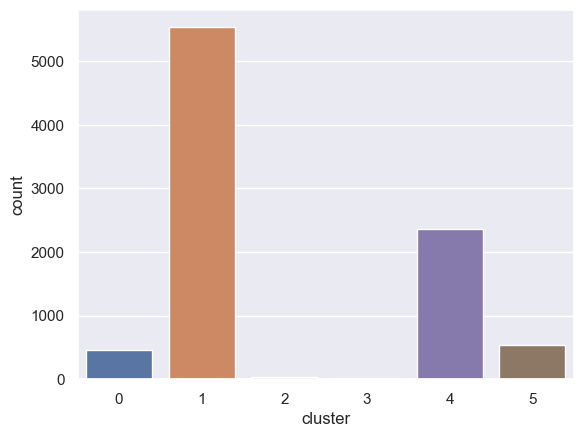

In [69]:
sns.countplot(x="cluster",data=df_kmean)
plt.show()

**Agglom clustering**

จากนั้นทำ Agglom clustering โดยกำหนดให้ k เท่ากับ 3 และ plot graph countplot ออมาดูจำนวน

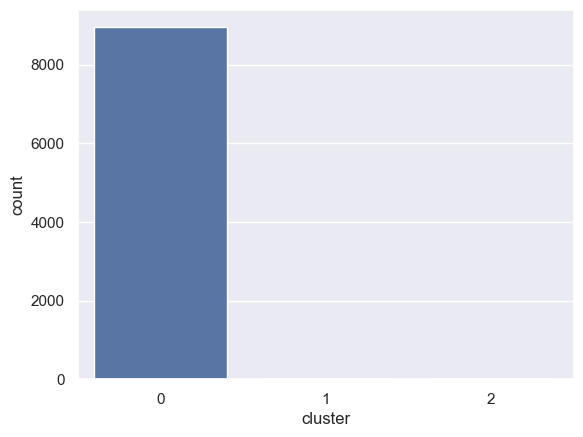

In [70]:
sns.countplot(x="cluster",data=df_agglom)
plt.show()

**Result analysis**

เมื่อทำการหาตัว cluster พบว่าตัว model ที่เป็น KMean สามารถทำการแบ่ง cluster กลุ่มออกมาได้แค่ 4 กลุ่มแต่ตัว model ที่เป็น Agglom ไม่สามารถทำการแบ่ง cluster กลุ่มได้ทำให้สรุปได้ว่า ก่อนการทำ Preprocessing Model มีแค่ตัว model KMean เท่านั้นที่สามารถใช้ได้กับข้อมมูล dataset นี้

# Preprocessing

In [71]:
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest

scaler = preprocessing.MinMaxScaler()

ทำการหาและตัด Outlier ภายใน Dataset โดยเลือกใช้ Isolation Forest

In [72]:
df2 = df.copy()
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df2)
scores=model.decision_function(df2)
anomaly=model.predict(df2)

df2['scores']=scores
df2['anomaly']=anomaly

anomaly = df2.loc[df2['anomaly']==-1]
anomaly_index = list(anomaly.index)
df2 = df2.drop(anomaly_index, axis = 0).reset_index(drop=True)
df2 = df2.drop(columns=['scores','anomaly'], axis = 0).reset_index(drop=True)

print(len(anomaly_index))
X_clean = df2.copy()

numeric_feature_scaling = numeric_feature.copy()
numeric_feature_scaling.remove("TENURE")

c:\Users\gmita\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


895


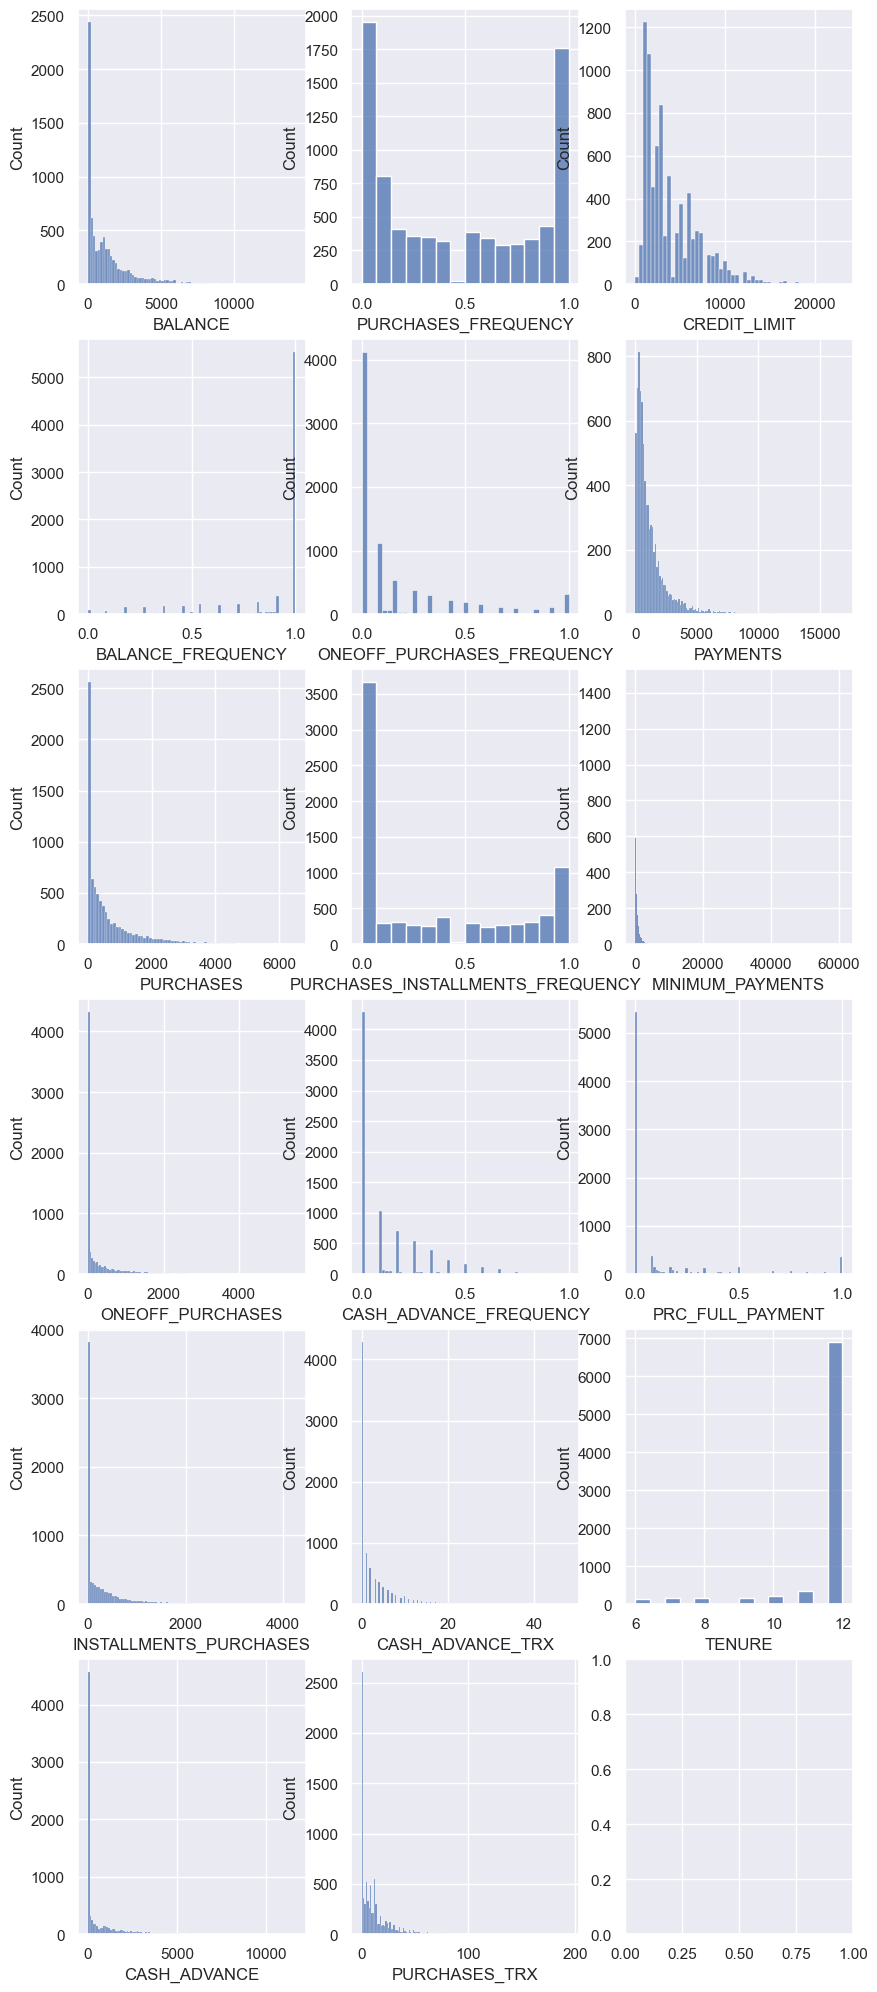

In [73]:
fig , axs = plt.subplots(6,3,figsize=(10,25))
for i in range(0,3):
    for j in range(0,6):
        if(((i*6)+j)==17):
            pass
        else:
            name = numeric_feature[(i*6)+j]
            sns.histplot(x=X_clean[name],ax=axs[j,i])
plt.show()

In [74]:
X_clean[numeric_feature_scaling] = scaler.fit_transform(X_clean[numeric_feature_scaling])

จัดการรวมข้อมูลให้อยู่ในช่วงตั้งแต่ 0 - 10000 โดยจะแบ่งเป็นช่วงละ 1000

In [75]:
X_group_numeric = df.copy()

for i in columns_group1:
    X_group_numeric.loc[X_group_numeric[i]==0,i] = 1
    for j in range(0,10):
        X_group_numeric.loc[(X_group_numeric[i]>j*1000) & (X_group_numeric[i]<=(j*1000)+1000),i] = j+1
    X_group_numeric.loc[X_group_numeric[i]>10000,i] = 11

for i in columns_group3:
    X_group_numeric.loc[X_group_numeric[i]==0,i] = 1
    for j in range(0,10):
        X_group_numeric.loc[(X_group_numeric[i]>j*10) & (X_group_numeric[i]<=(j*10)+10),i] = j+1
    X_group_numeric.loc[X_group_numeric[i]>100,i] = 11



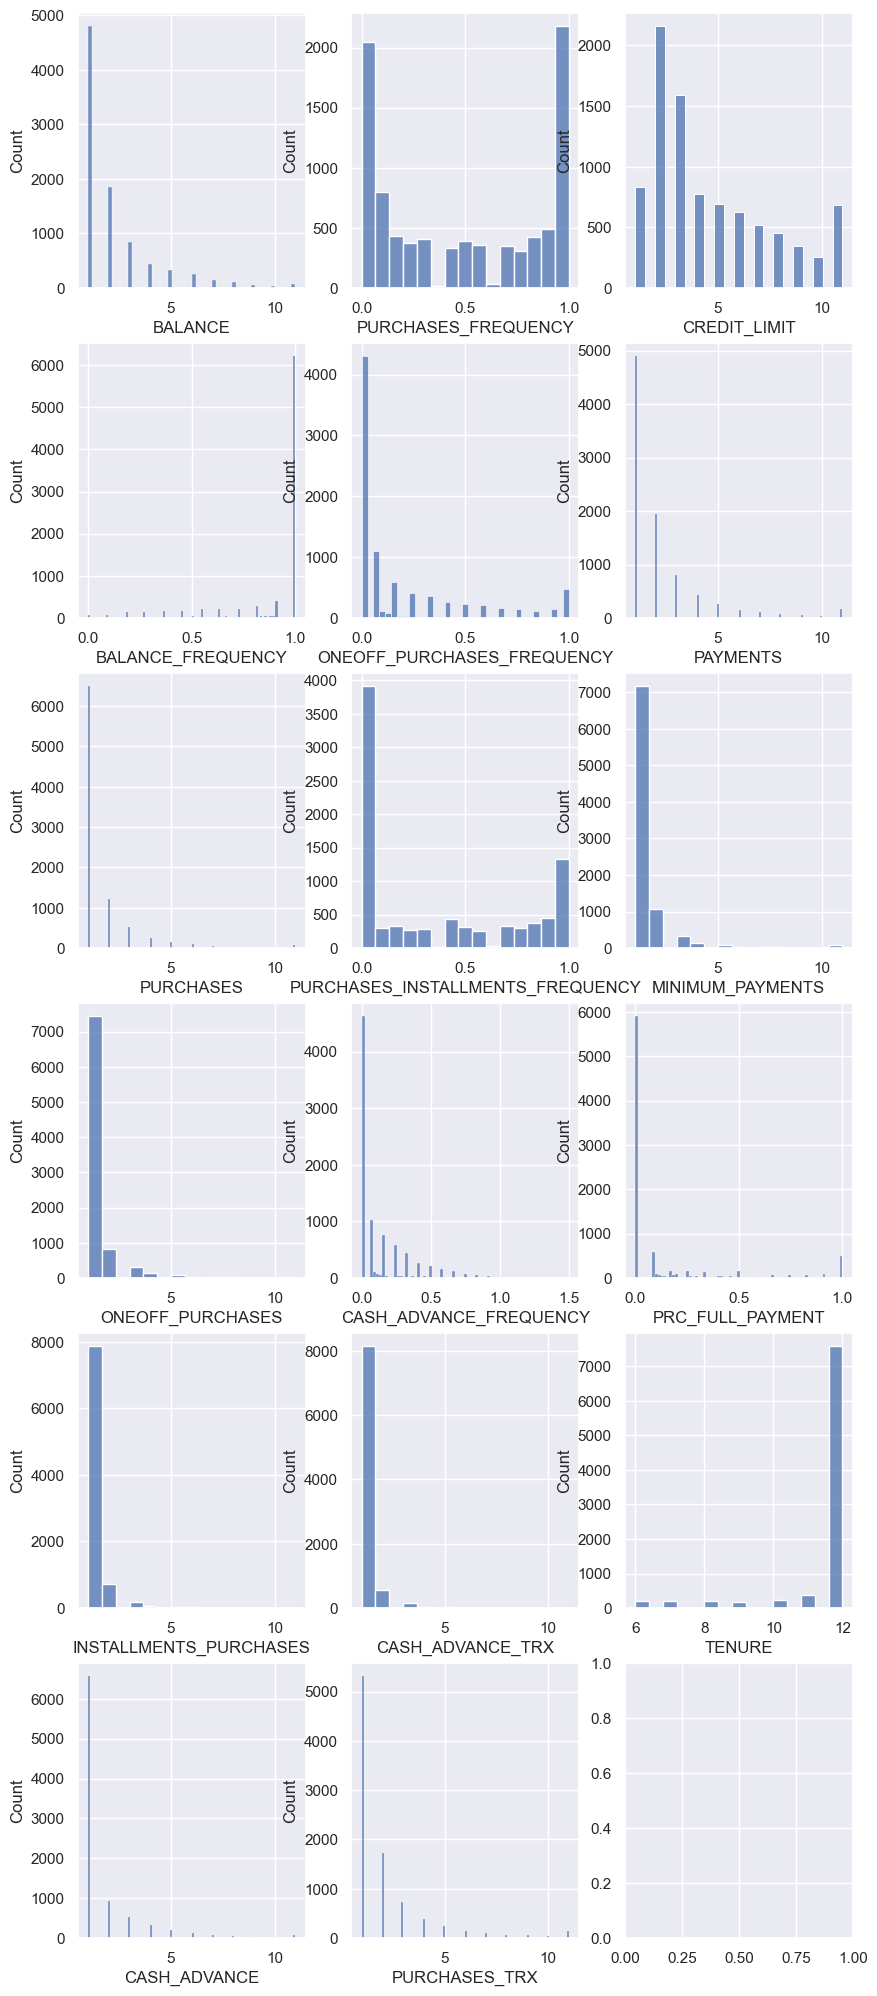

In [76]:
fig , axs = plt.subplots(6,3,figsize=(10,25))
for i in range(0,3):
    for j in range(0,6):
        if(((i*6)+j)==17):
            pass
        else:
            name = numeric_feature[(i*6)+j]
            sns.histplot(x=X_group_numeric[name],ax=axs[j,i])
plt.show()

โดยหลังจากตัด Outlier โดยการจัดข้อมูลเป็นช้วง Range และการตัดโดยใช้ Isolation Forest หลังจากนั้นเอาข้อมูลที่ได้มาทำ Dendrogram และ Elbow Method ในการหาค่า N - clusters

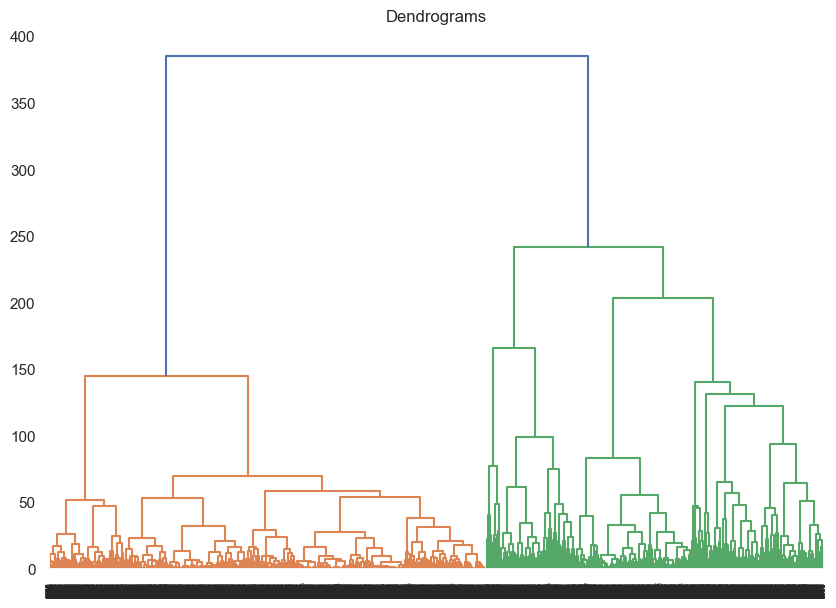

In [77]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X_group_numeric, method='ward'))

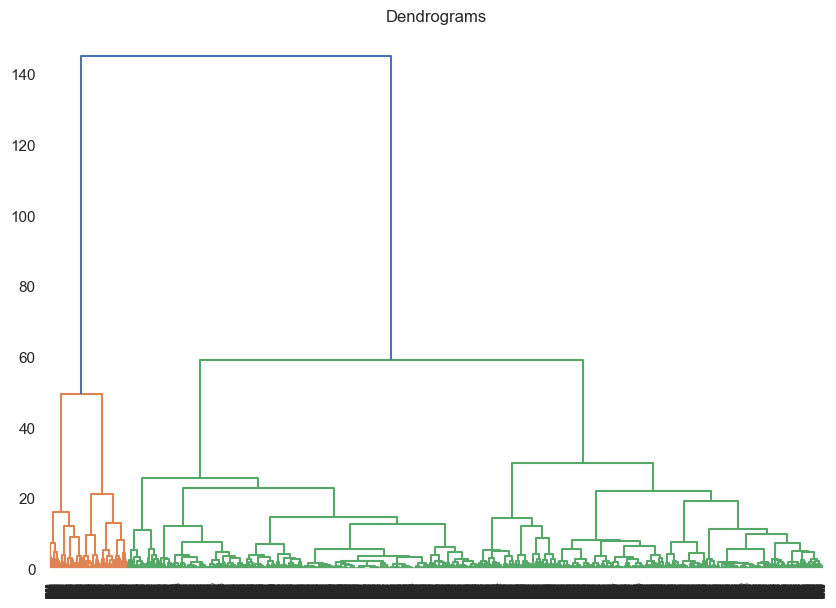

In [78]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X_clean, method='ward'))

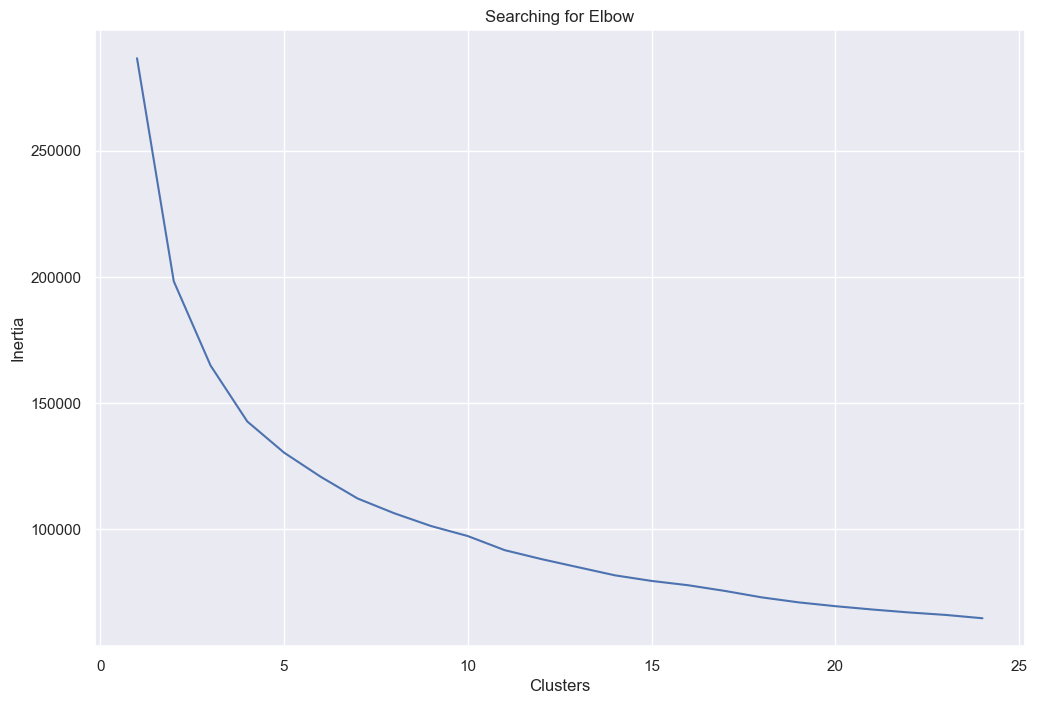

In [79]:
ElbowGraph(X_group_numeric)

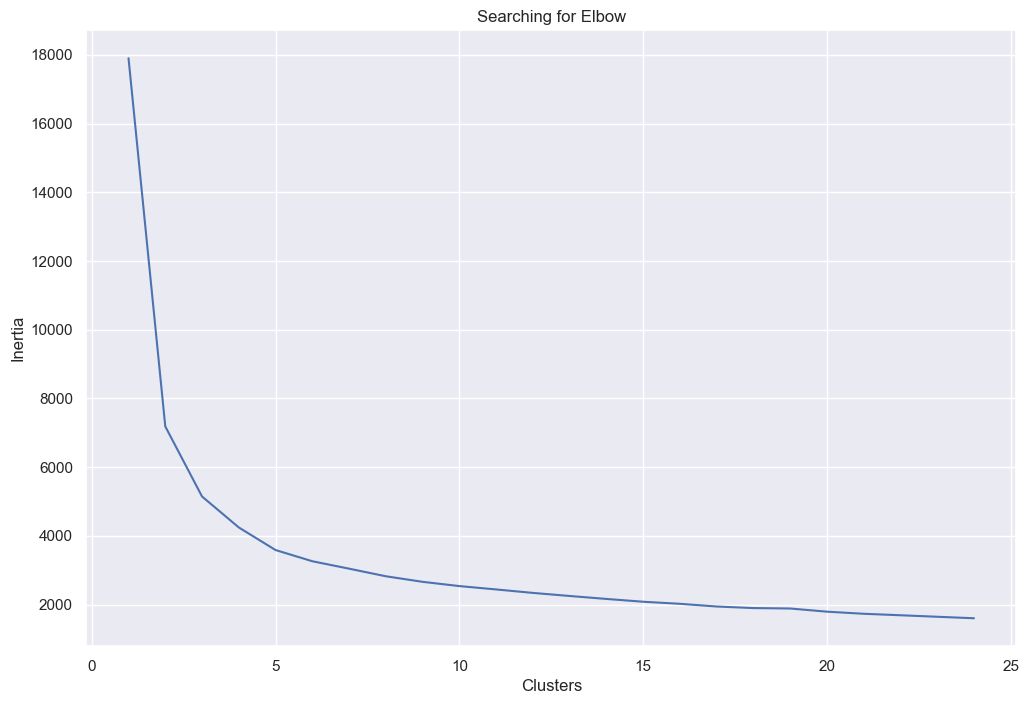

In [80]:
ElbowGraph(X_clean)

โดยผลลัพธ์ที่เลือกจากการทำ Elbow method และการทำ Dendrogram จะได้ค่า N ที่เลือกคือ 4

In [81]:
class_n = 4
km3 = KMeans(n_clusters=class_n).fit(X_group_numeric)
print('Silhoutte score of this model is ' + str(silhouette_score(X_group_numeric, km3.labels_)))

class_n = 4
agglom = AgglomerativeClustering(n_clusters=class_n, linkage='average').fit(X_group_numeric)
print('Silhoutte score of this model is ' + str(silhouette_score(X_group_numeric, agglom.labels_)))

Silhoutte score of this model is 0.3350513821288633
Silhoutte score of this model is 0.5922172407986727


In [82]:
class_n = 4
km3 = KMeans(n_clusters=class_n).fit(X_clean)
print('Silhoutte score of this model is ' + str(silhouette_score(X_clean, km3.labels_)))

class_n = 4
agglom = AgglomerativeClustering(n_clusters=class_n, linkage='ward').fit(X_clean)
print('Silhoutte score of this model is ' + str(silhouette_score(X_clean, agglom.labels_)))


Silhoutte score of this model is 0.3697713515565881
Silhoutte score of this model is 0.32365857069558157


PCA

ทำ PCA เพื่อลดจำนวน Feature ของข้อมูลและลด Feature ที่มีการ Correlation กันสูง โดยเลือกใช้ให้มี Explained Variance = 90%

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.9)
X_pca =  pca.fit_transform(X_group_numeric)
X_pca = pd.DataFrame(X_pca)

X_pca_clean = pca.fit_transform(X_clean)
X_pca_clean = pd.DataFrame(X_pca_clean)

In [84]:
X_pca = X_pca.rename(columns={0: "PCA1",1:"PCA2",2: "PCA3",3:"PCA4",4: "PCA5",5: "PCA6"})
X_pca_clean = X_pca_clean.rename(columns={0: "PCA1",1:"PCA2",2: "PCA3",3:"PCA4",4: "PCA5",5: "PCA6"})

In [85]:
X_pca.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0 -4.107320  0.451104  0.622813  0.113158 -0.737684  0.035865
1  4.076973 -3.594667  3.268985 -1.861145 -0.553488 -1.237488
2  1.924399 -1.621939 -2.939590  0.435778 -0.094195 -0.262589
3  1.664828 -1.307578 -3.077341 -0.473049 -0.123896  0.845810
4 -3.386604  0.134907  0.049997 -0.056380 -0.683896  0.081232

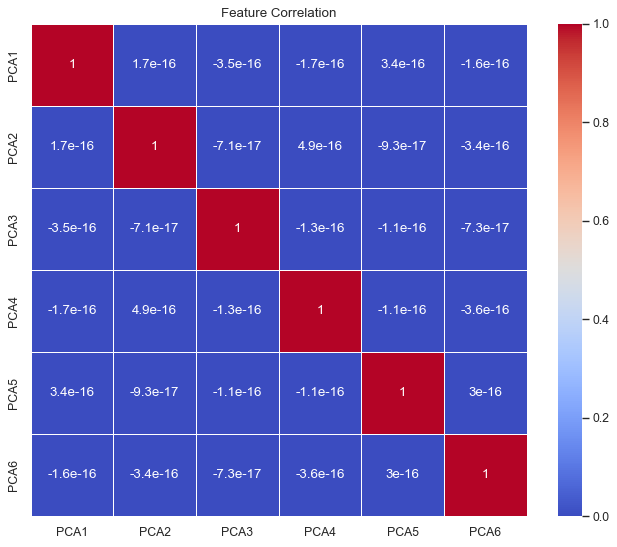

In [86]:
plt.figure(figsize=(10,8),dpi=80)
df2 = X_pca.copy()
plt.title('Feature Correlation')
sns.heatmap(df2.corr(),cmap="coolwarm",annot=True,linewidth=0.5)
plt.show()
del df2

In [87]:
X_pca_clean.head()

PCA1      PCA2      PCA3      PCA4
0 -0.408547 -0.443076 -0.145111  0.025752
1 -0.406873 -0.653819 -0.045151 -0.040991
2 -0.466713  0.276399  0.885604  0.271159
3 -0.413059 -0.524036  0.044007  0.161419
4 -0.411471 -0.529402  0.002509 -0.011375

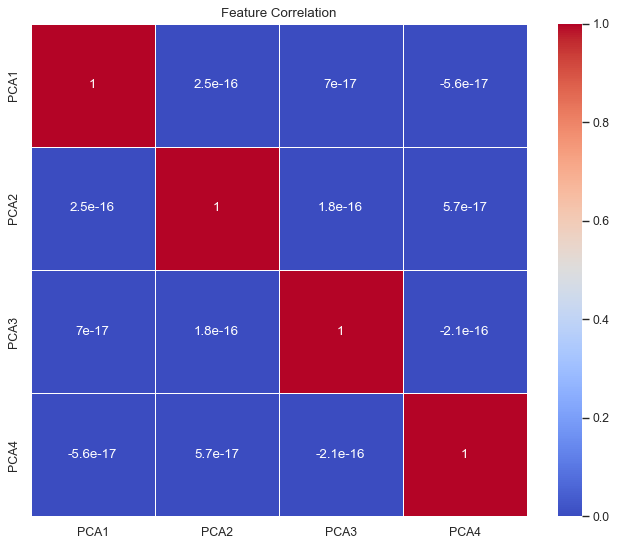

In [88]:
plt.figure(figsize=(10,8),dpi=80)
df2 = X_pca_clean.copy()
plt.title('Feature Correlation')
sns.heatmap(df2.corr(),cmap="coolwarm",annot=True,linewidth=0.5)
plt.show()
del df2

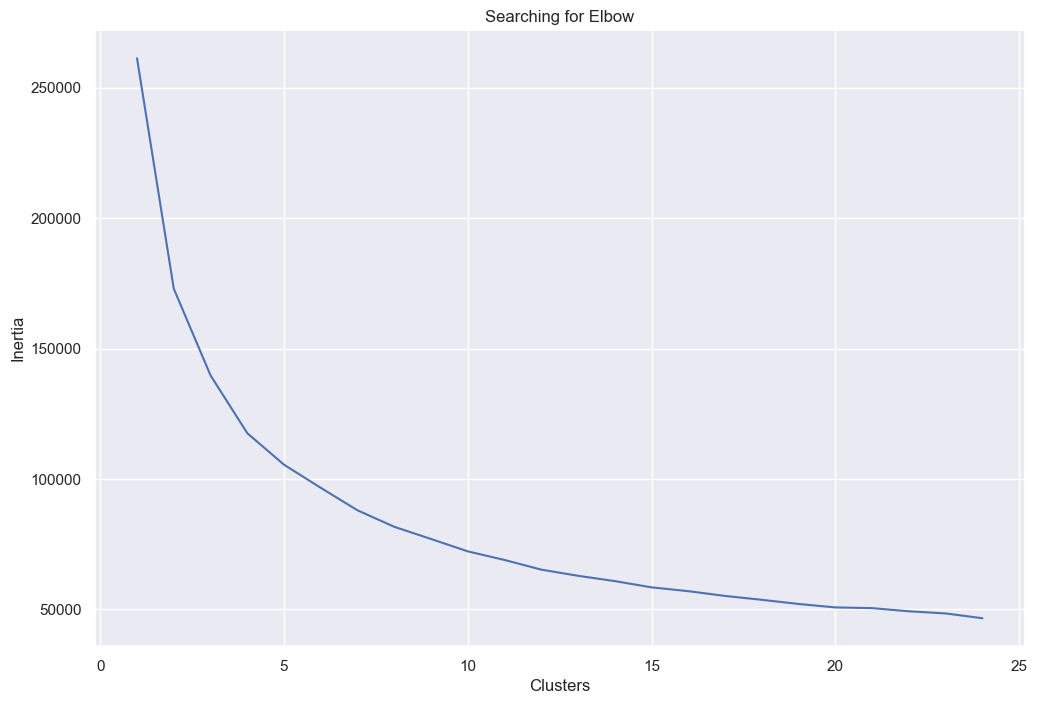

In [89]:
ElbowGraph(X_pca)

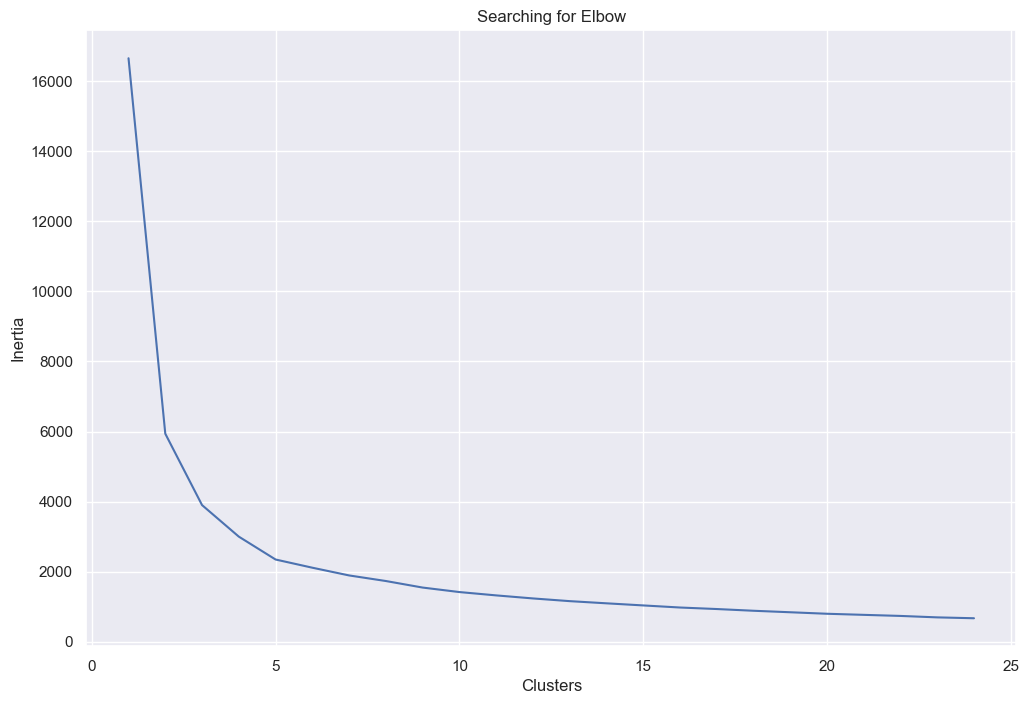

In [90]:
ElbowGraph(X_pca_clean)

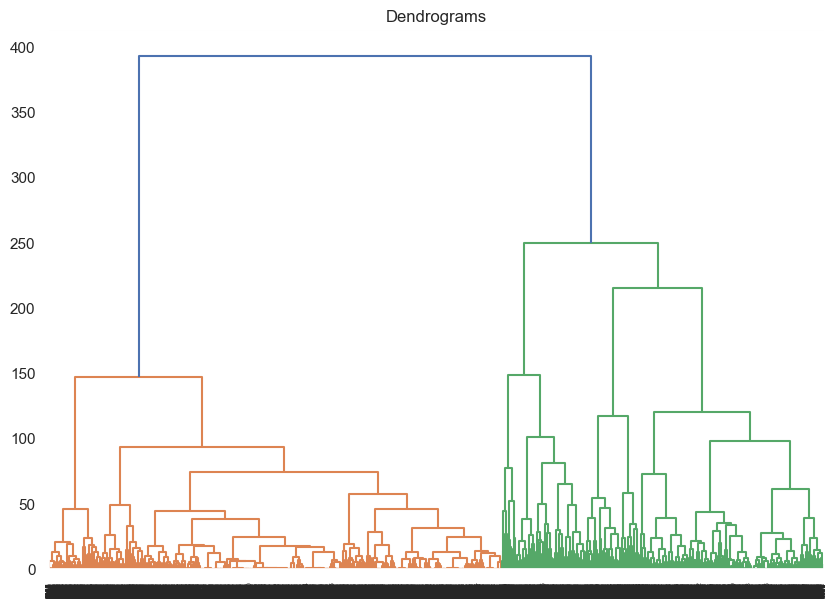

In [91]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X_pca, method='ward'))

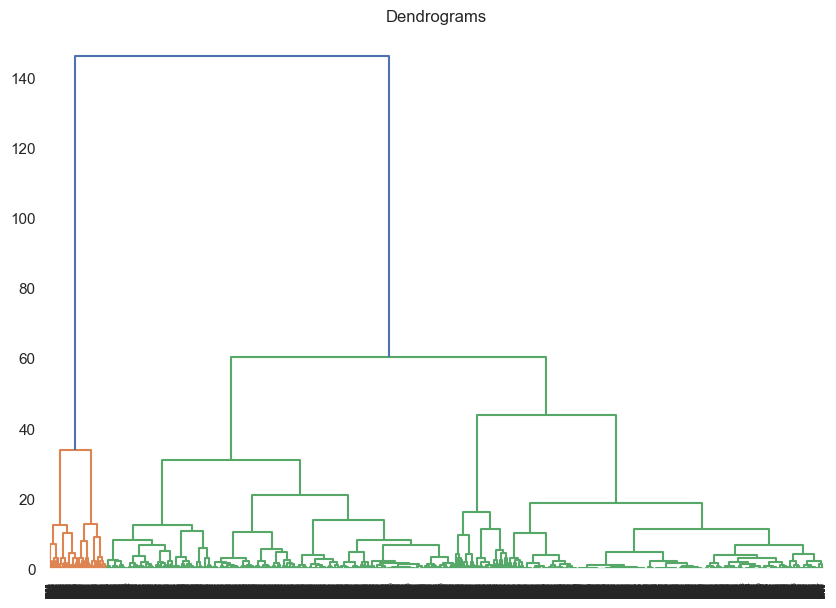

In [92]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(X_pca_clean, method='ward'))

In [93]:
class_n = 4
km3 = KMeans(n_clusters=class_n,random_state=0).fit(X_pca)
print('Silhoutte score of K-Mean group dataset model is ' + str(silhouette_score(X_pca, km3.labels_)))

class_n = 3
agglom = AgglomerativeClustering(n_clusters=class_n, linkage='ward').fit(X_pca)
print('Silhoutte score of Agglomerative group dataset model is ' + str(silhouette_score(X_pca, agglom.labels_)))


Silhoutte score of K-Mean group dataset model is 0.3686294411392944
Silhoutte score of Agglomerative group dataset model is 0.3503197125891553


In [94]:
class_n = 4
km = KMeans(n_clusters=class_n,random_state=0).fit(X_pca_clean)
print('Silhoutte score of K-Mean group dataset model is ' + str(silhouette_score(X_pca_clean, km.labels_)))

class_n = 4
agglom_clean = AgglomerativeClustering(n_clusters=class_n, linkage='ward').fit(X_pca_clean)
print('Silhoutte score of Agglomerative group dataset model is ' + str(silhouette_score(X_pca_clean, agglom_clean.labels_)))

Silhoutte score of K-Mean group dataset model is 0.4586993662338429
Silhoutte score of Agglomerative group dataset model is 0.4396297366158472


In [95]:
kmean_pca_group = pd.concat([X_pca,pd.DataFrame({'cluster':km3.labels_})],axis=1)
agglom_pca_group = pd.concat([X_pca,pd.DataFrame({'cluster':agglom.labels_})],axis=1)

kmean_pca_clean = pd.concat([X_pca,pd.DataFrame({'cluster':km.labels_})],axis=1)
agglom_pca_clean =pd.concat([X_pca,pd.DataFrame({'cluster':agglom_clean.labels_})],axis=1)

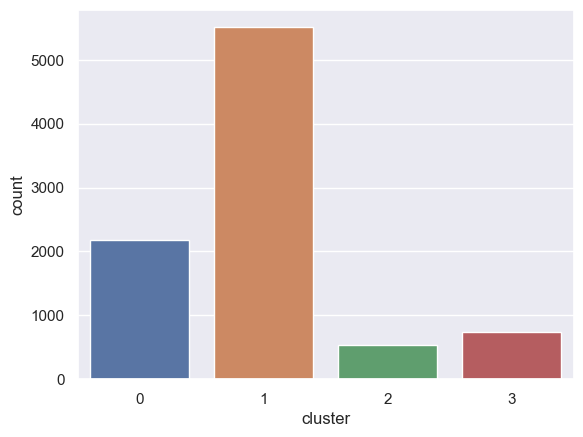

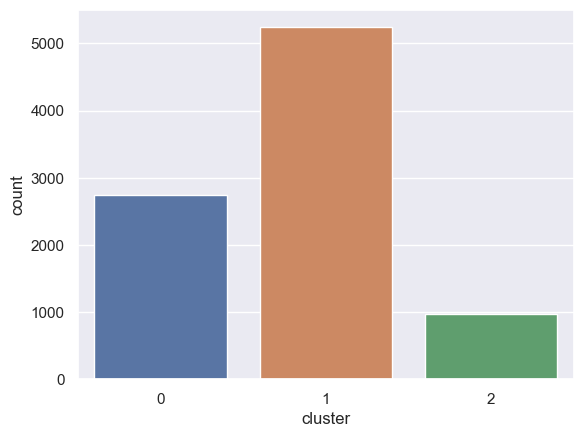

In [96]:
sns.countplot(x="cluster",data=kmean_pca_group)
plt.show()
sns.countplot(x="cluster",data=agglom_pca_group)
plt.show()

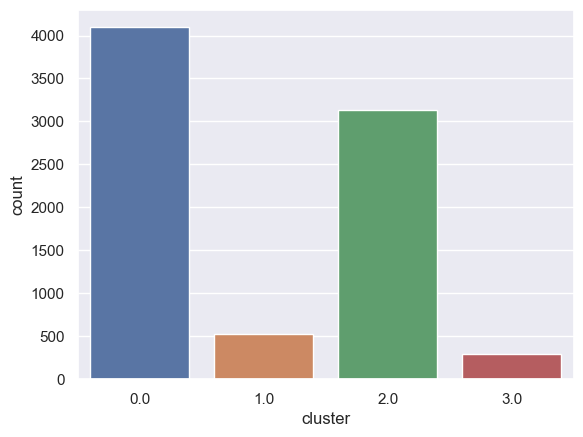

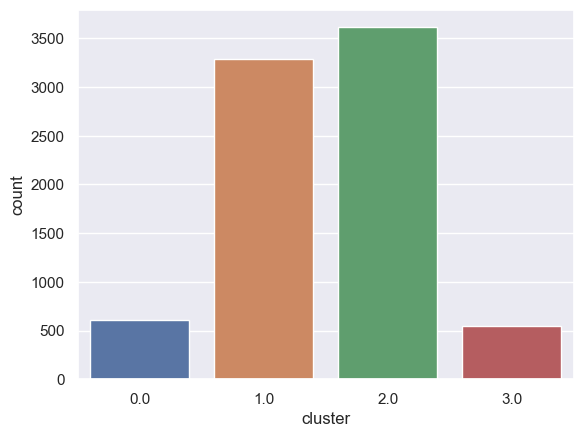

In [97]:
sns.countplot(x="cluster",data=kmean_pca_clean)
plt.show()
sns.countplot(x="cluster",data=agglom_pca_clean)
plt.show()

# Result Analysis

In [98]:
# We have dataframe name kmean_pca which have 5 clusters
result_kmean_group = pd.concat([X_group_numeric,pd.DataFrame({'cluster':km3.labels_})],axis=1)
result_kmean_clean = pd.concat([X_clean,pd.DataFrame({'cluster':km.labels_})],axis=1)

c:\Users\gmita\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


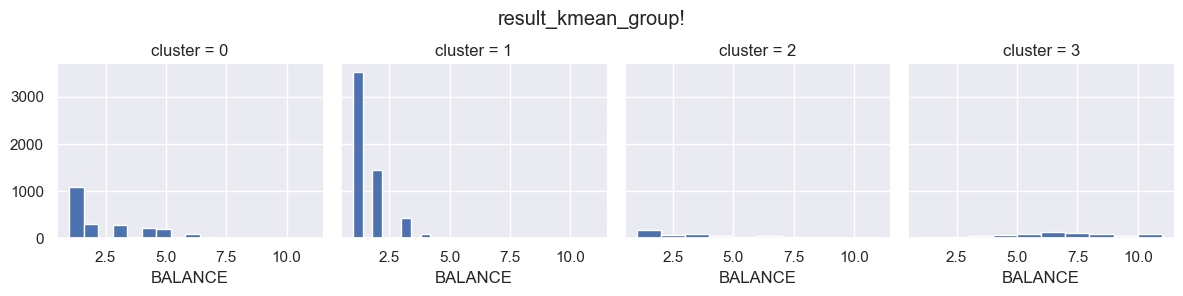

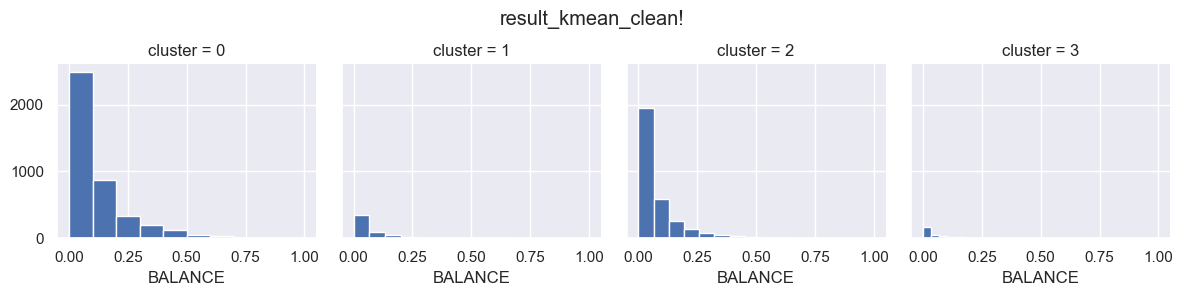

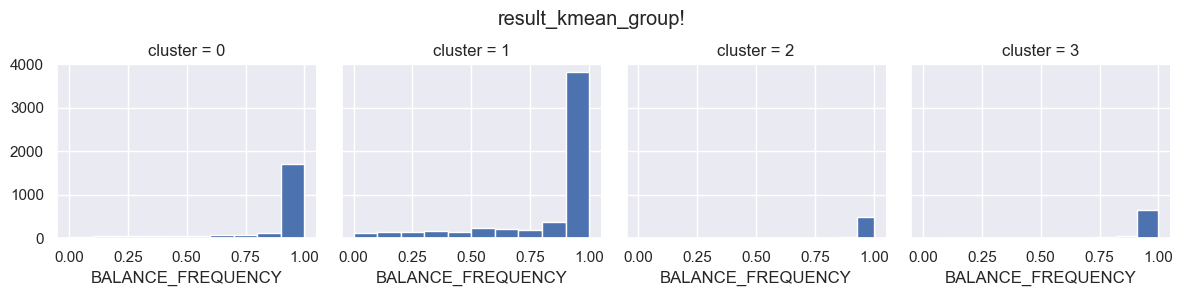

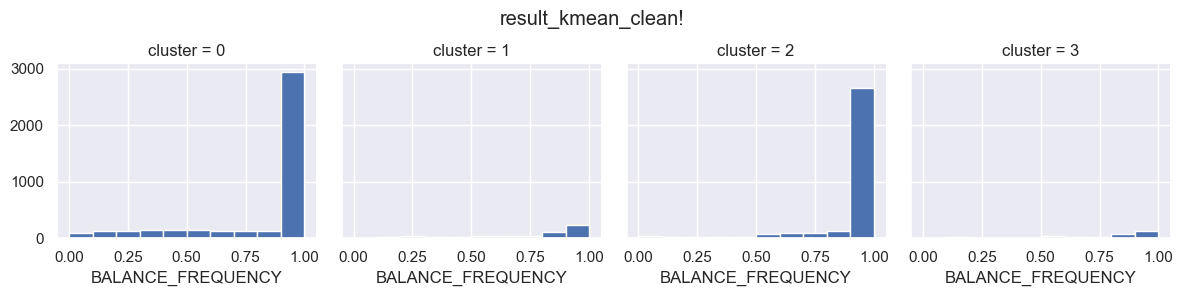

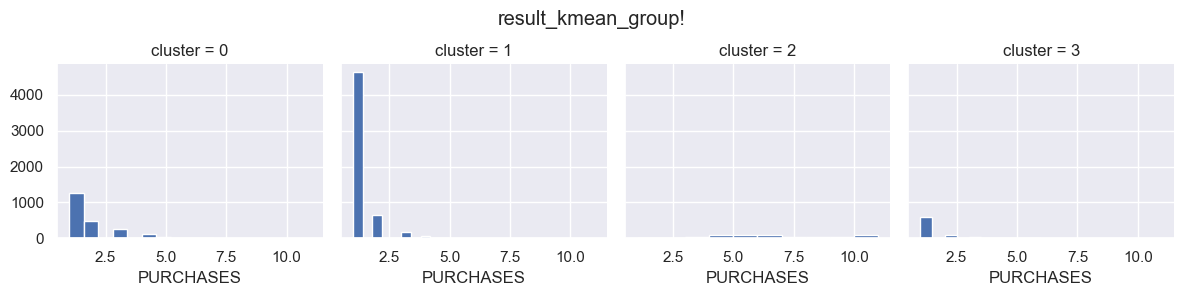

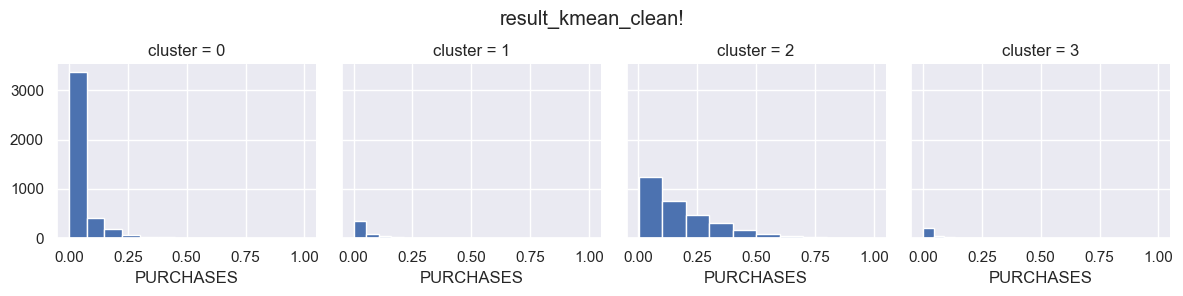

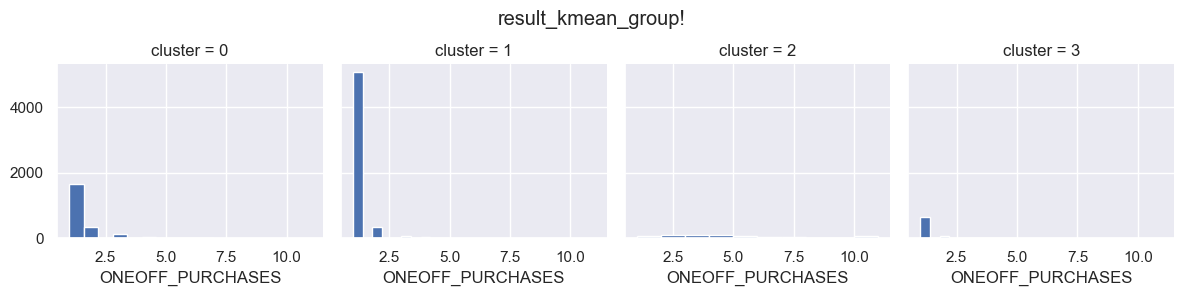

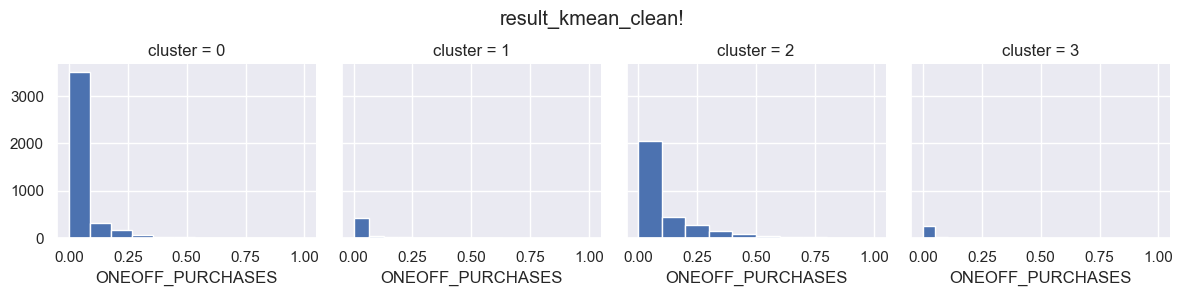

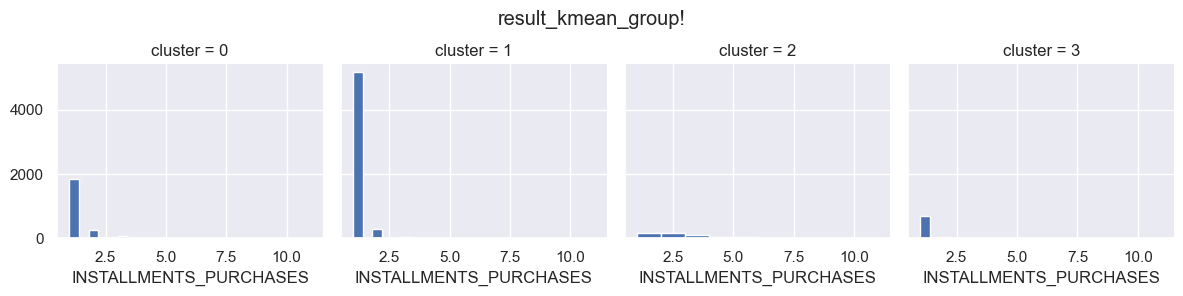

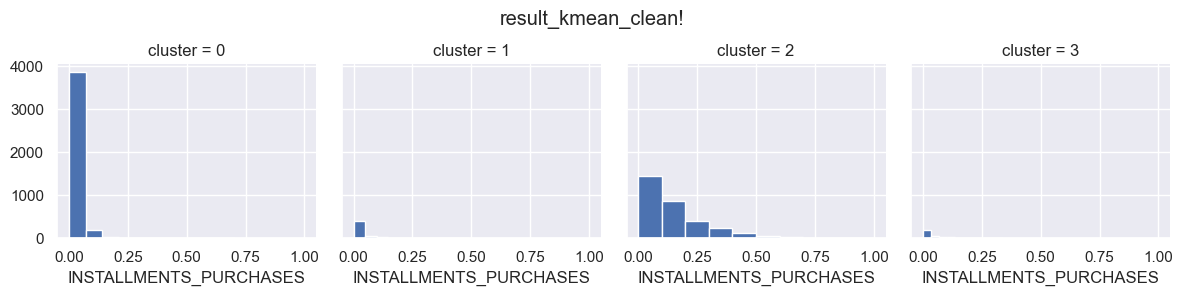

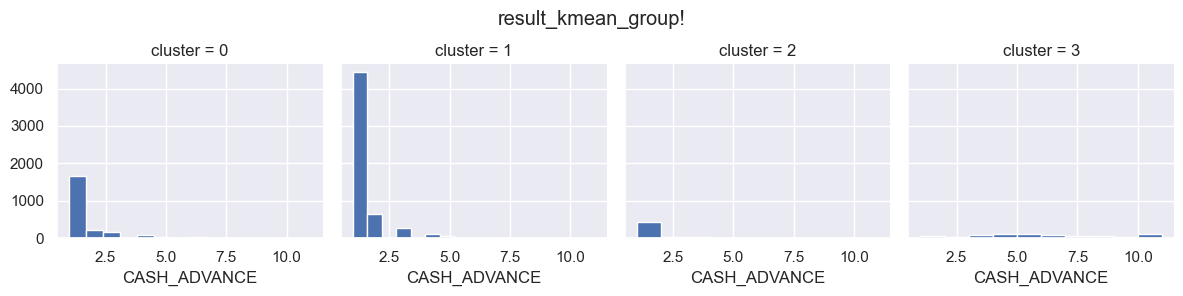

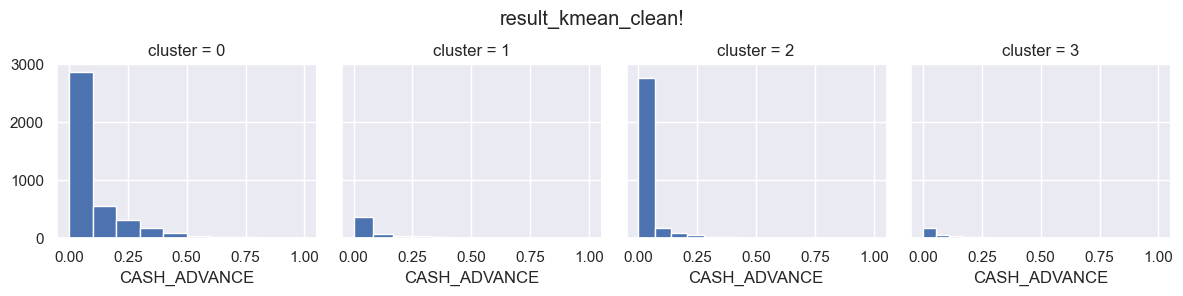

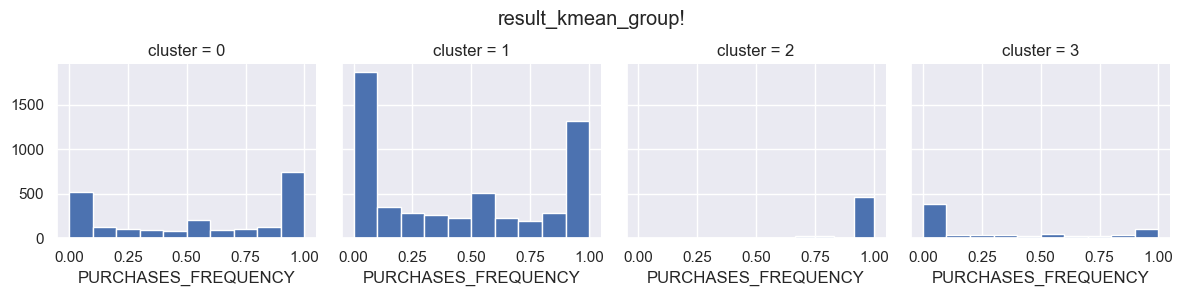

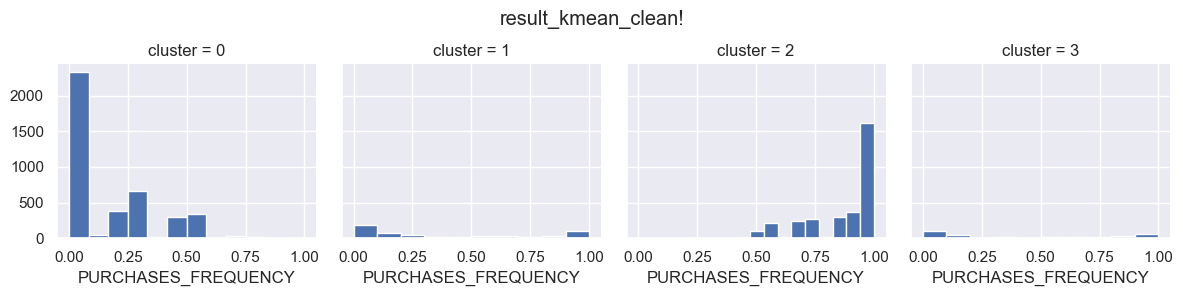

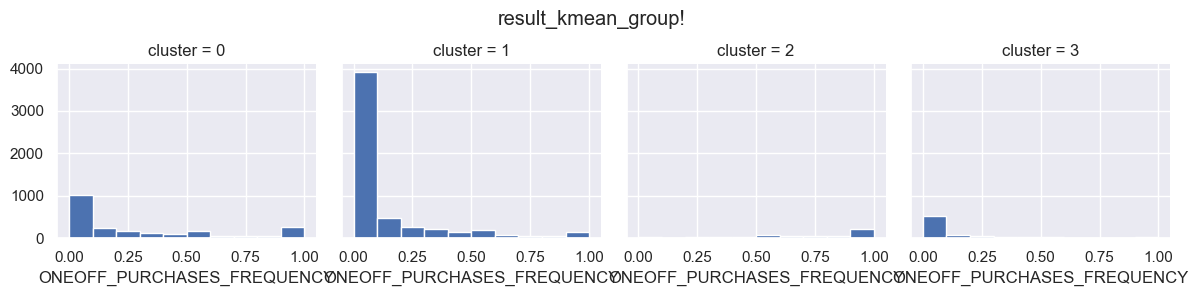

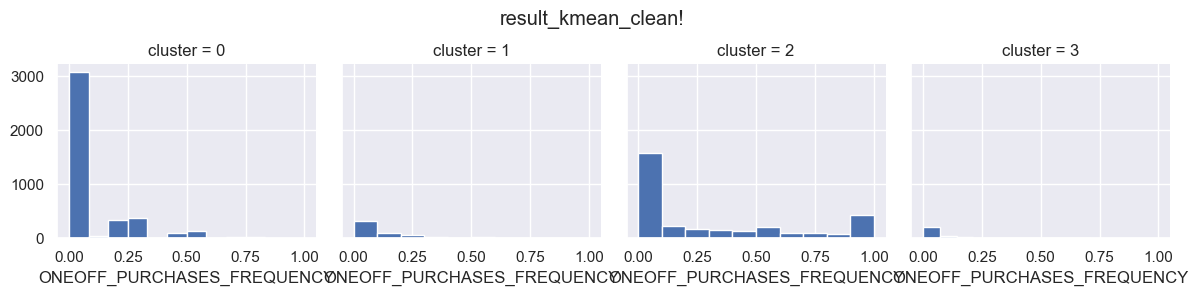

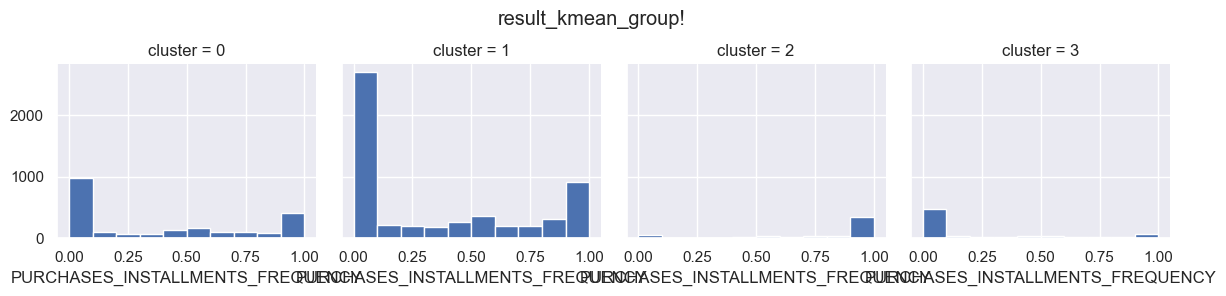

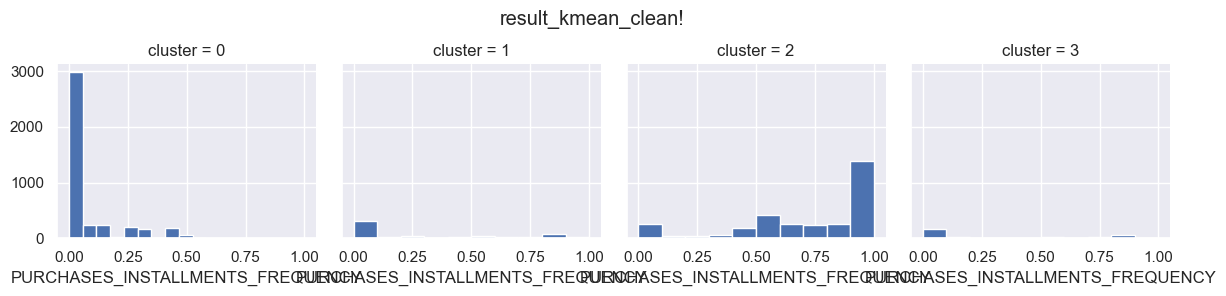

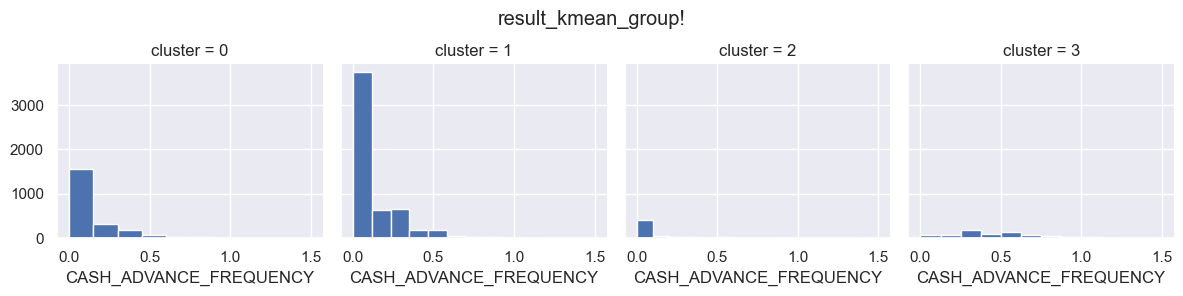

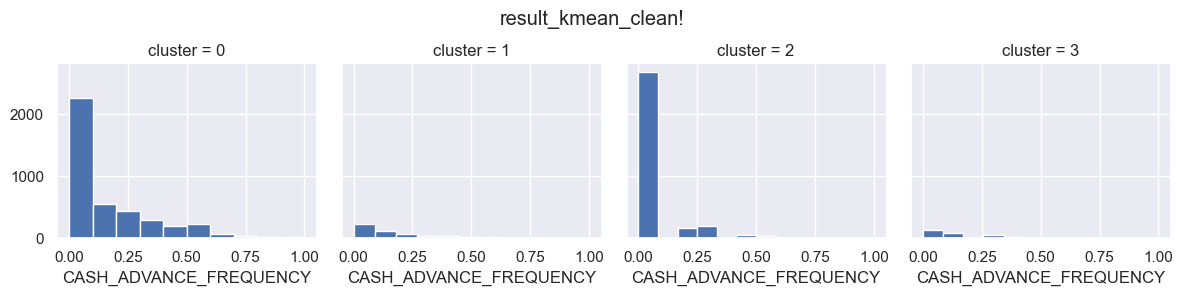

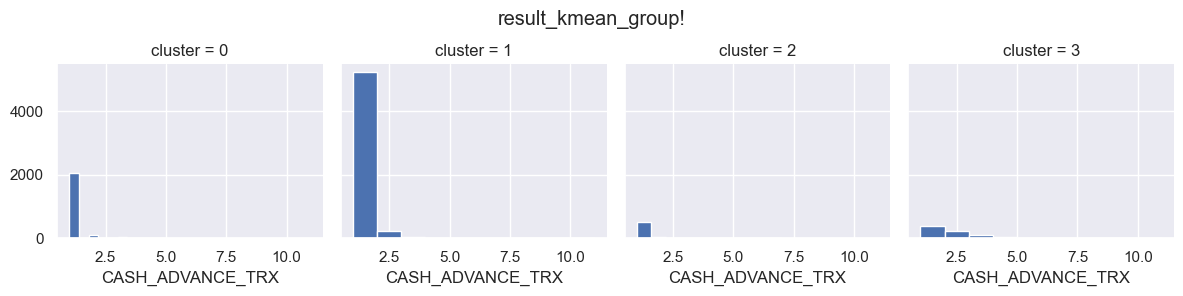

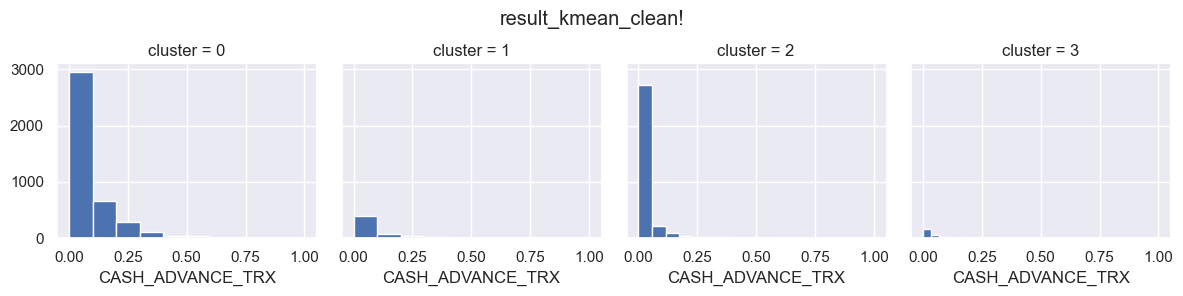

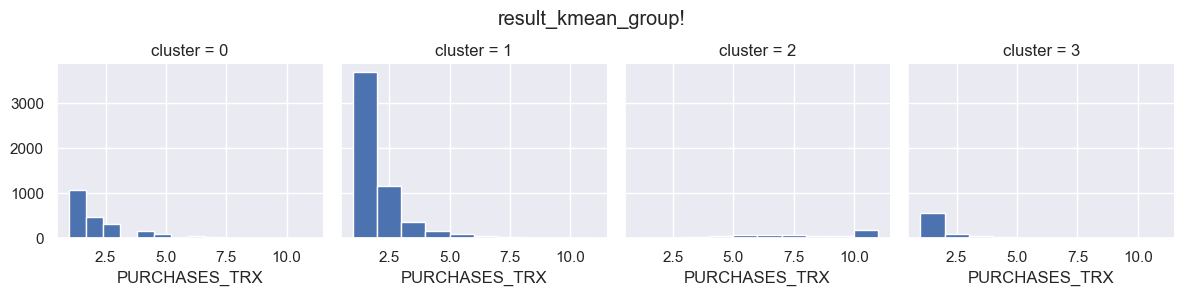

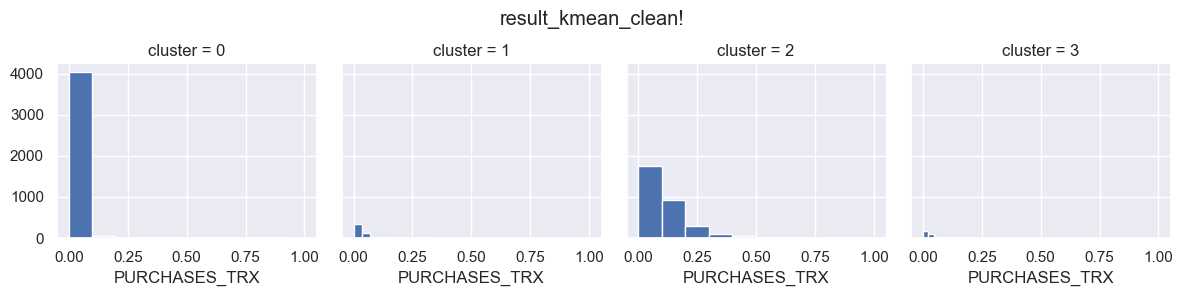

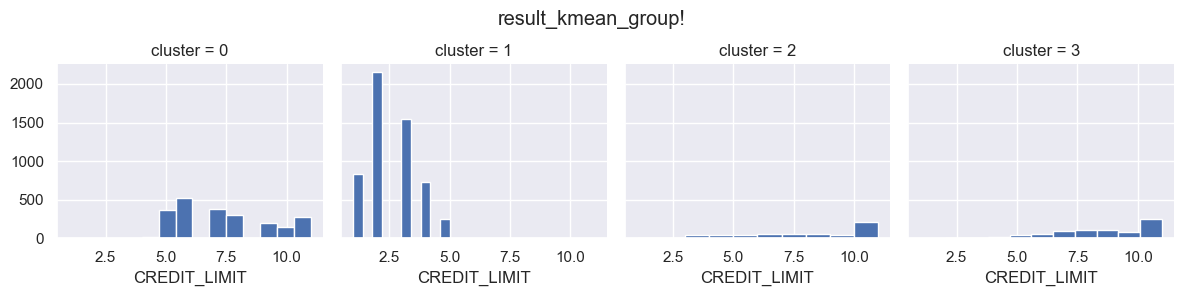

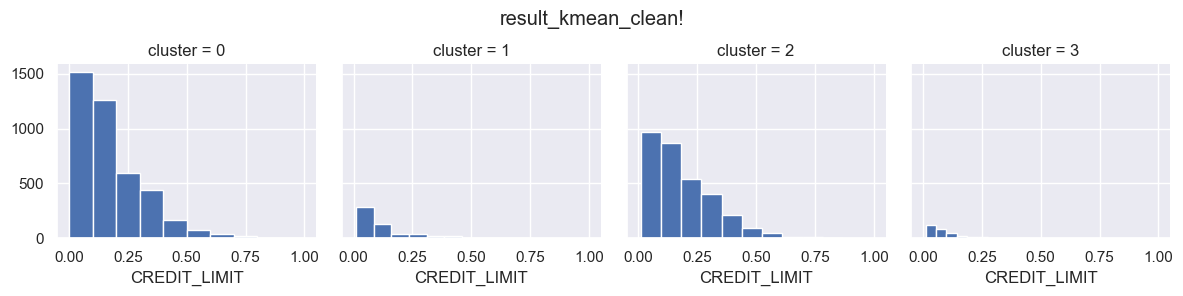

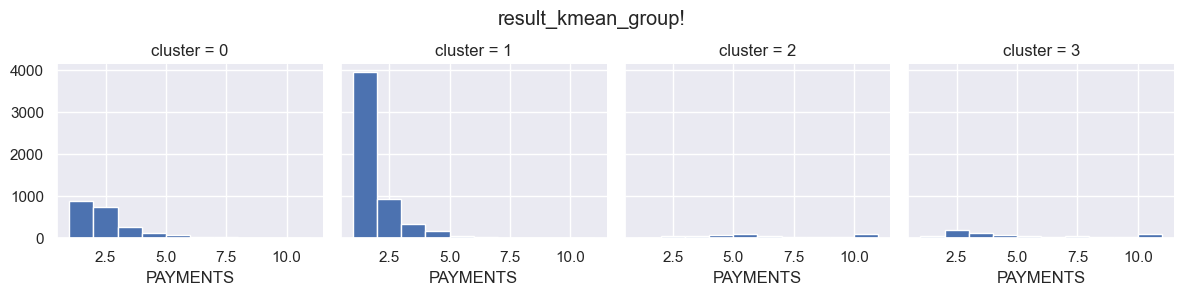

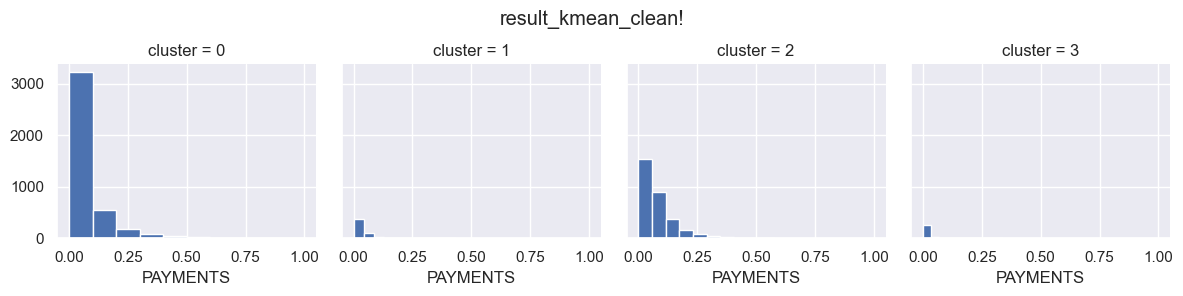

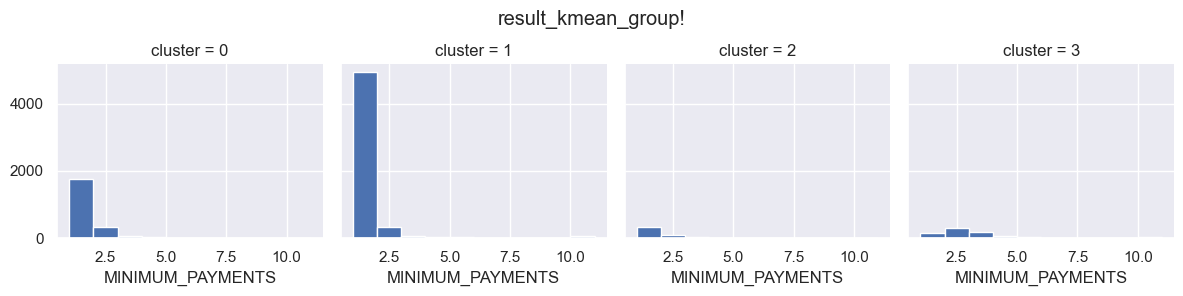

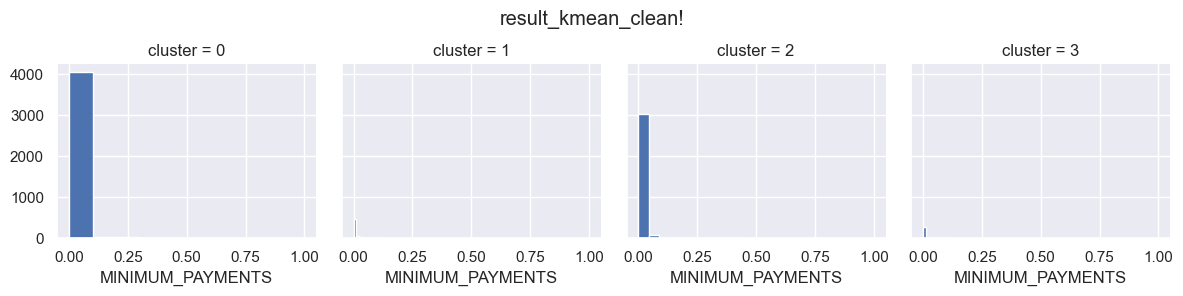

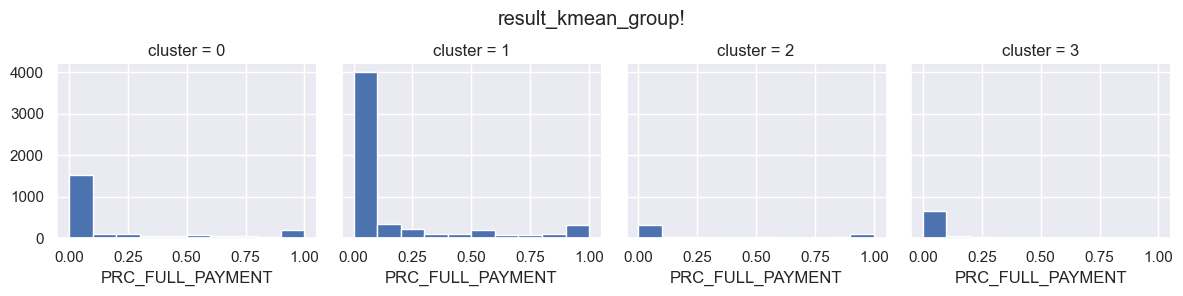

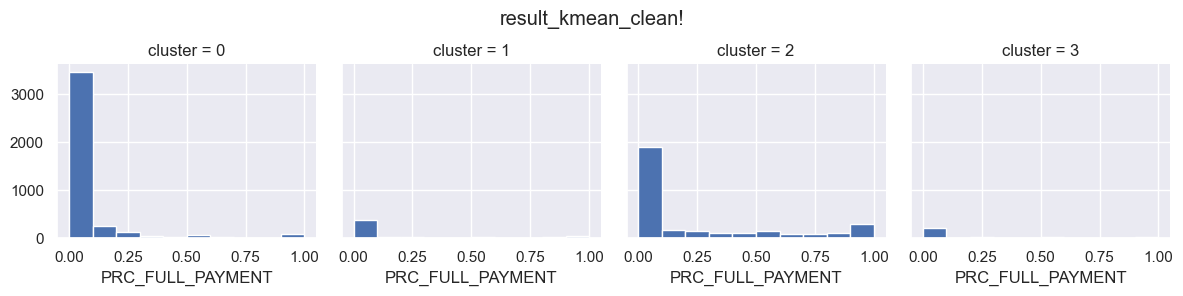

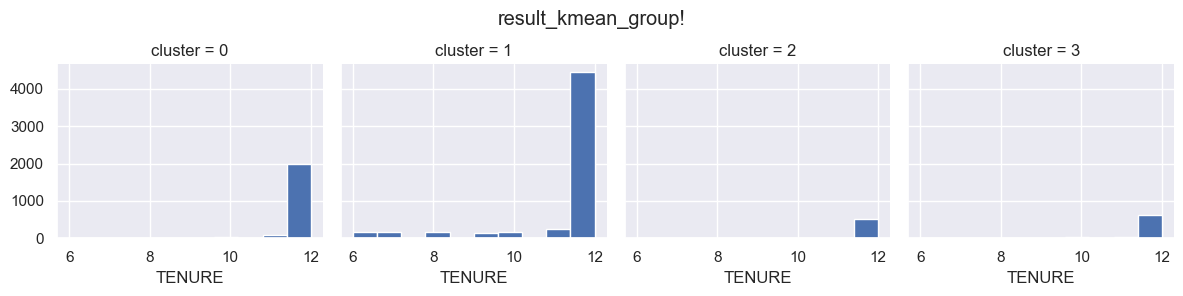

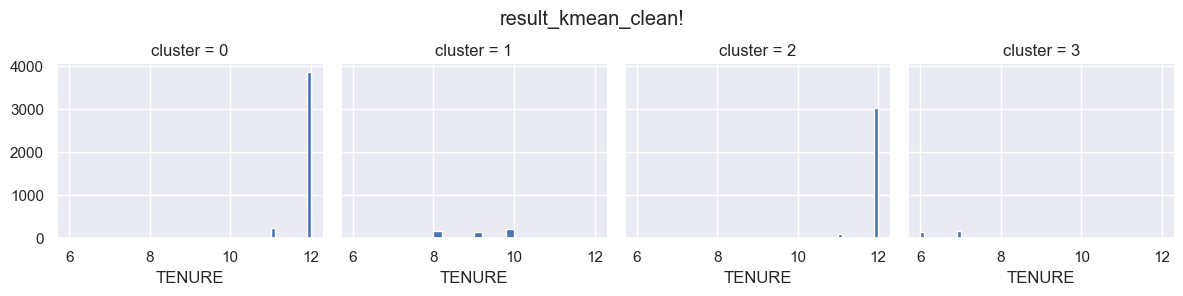

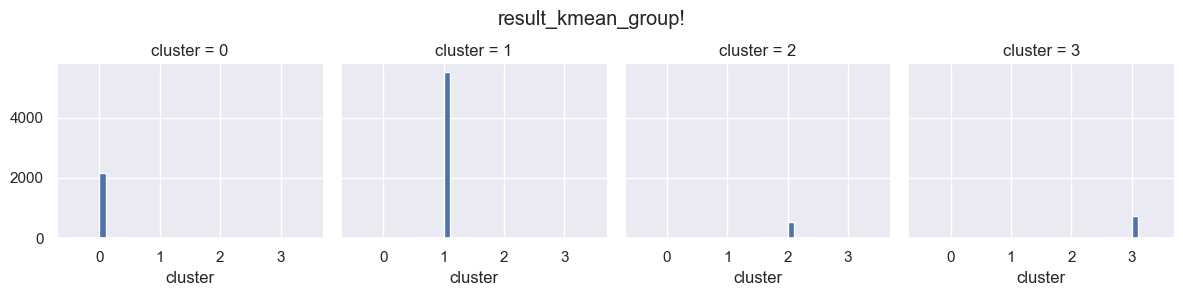

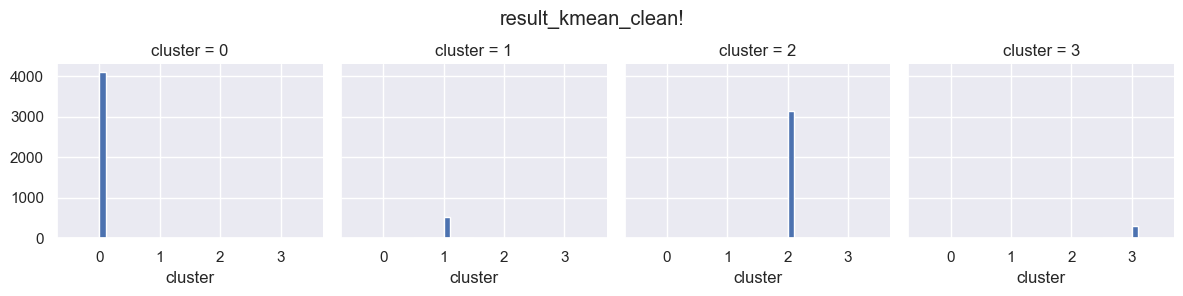

In [99]:
for i in result_kmean_group:
    grid= sns.FacetGrid(result_kmean_group, col='cluster')
    grid.map(plt.hist, i)
    grid.fig.subplots_adjust(top=0.8)   
    grid.fig.suptitle('result_kmean_group!')

    grid= sns.FacetGrid(result_kmean_clean, col='cluster')
    grid.map(plt.hist, i)
    grid.fig.subplots_adjust(top=0.8)
    grid.fig.suptitle('result_kmean_clean!')



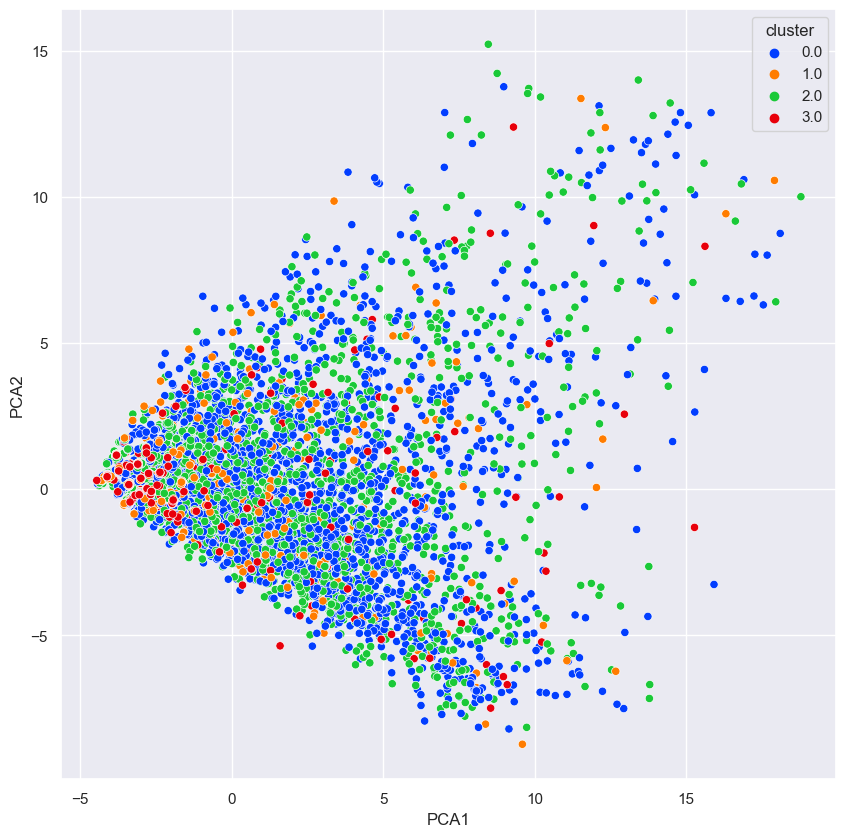

In [100]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=kmean_pca_clean, palette='bright')

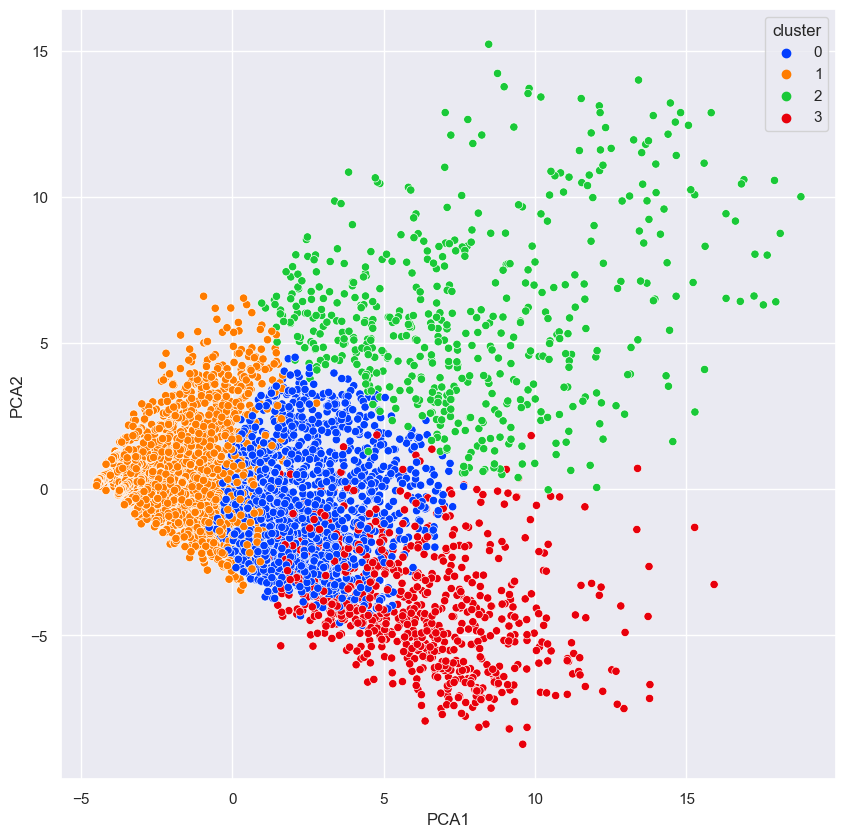

In [101]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=kmean_pca_group, palette='bright')

# Some feature from clustering
- Balance
- purchase
- Credit limit
- Cash Advance
- Payment
- Tenure

Text(0.5, 0.98, 'result_kmean_clean!')

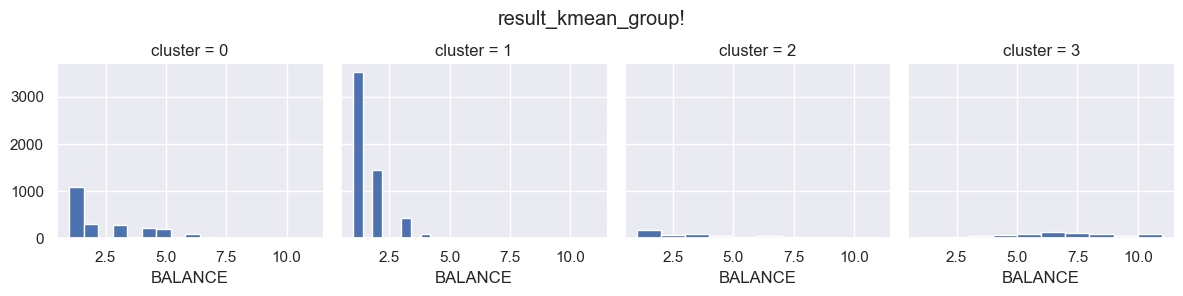

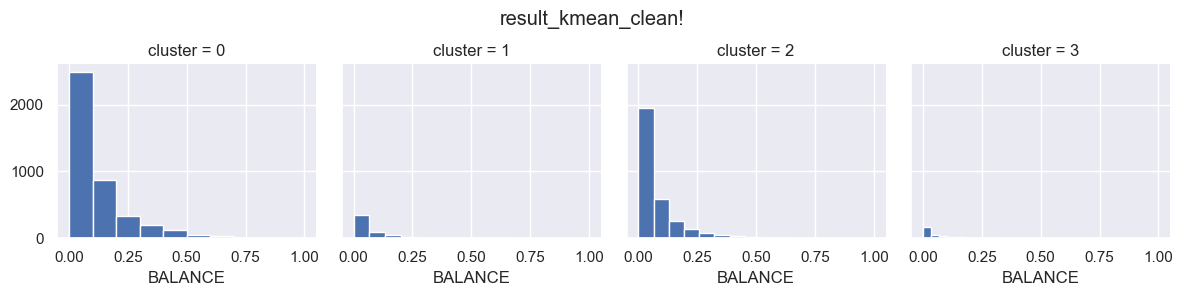

In [102]:
grid= sns.FacetGrid(result_kmean_group, col='cluster')
grid.map(plt.hist, "BALANCE")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_group!')

grid= sns.FacetGrid(result_kmean_clean, col='cluster')
grid.map(plt.hist, "BALANCE")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_clean!')


จากกราฟข้างต้นพบว่าในข้อมูล Balance ใน cluster 3 ของ result_kmean_group ค่อนข้างที่จะแตกต่างจาก cluster อื่นๆ เนื่องจากมีค่า balance มากกว่า ข้อมูล cluster อื่นๆ ซี่งอาจจะสามารถบอกได้ว่า ผู้คนที่อยู่ใน cluster 3 มีแนวโน้มอาจจะมีเงินที่อยู่ในบัญชีมากกว่า cluster อื่นๆ แต่เมื่อดูข้อมูล Balance จาก result_kmean_clean ข้อมูลไม่ได้มีความแตกต่างกันมาก
 

Text(0.5, 0.98, 'result_kmean_clean!')

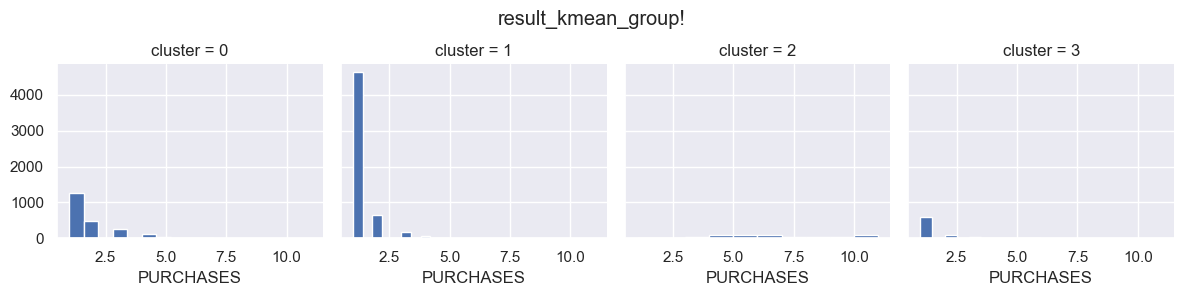

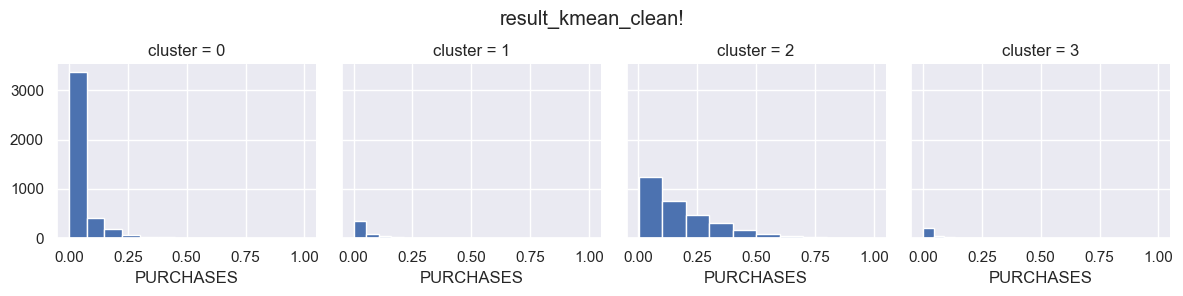

In [103]:
grid= sns.FacetGrid(result_kmean_group, col='cluster')
grid.map(plt.hist, "PURCHASES")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_group!')

grid= sns.FacetGrid(result_kmean_clean, col='cluster')
grid.map(plt.hist, "PURCHASES")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_clean!')


จากกราฟข้างต้นพบว่าในข้อมูล Purchases ใน cluster 2 ของ result_kmean_group แยกจาก cluster อื่นๆอย่างชัดเจนแต่ที่มีจำนวนที่น้อยอาจจะเพราะว่า cluster 2 มีจำนวน sample ที่น้อย ซี่งอาจจะสามารถบอกได้ว่า บุคคลที่อยู่ใน cluster 2 เป็นบุคคลที่มีจำนวนครั้งการซื้อมากกว่า cluster อื่นๆ แต่เมื่อดูข้อมูล Purchases จาก result_kmean_clean ก็ไม้ได้แตกต่างมากนัก
 

Text(0.5, 0.98, 'result_kmean_clean!')

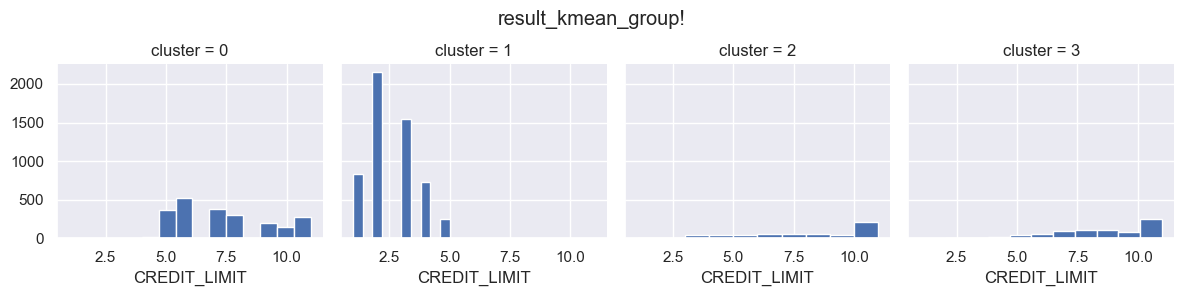

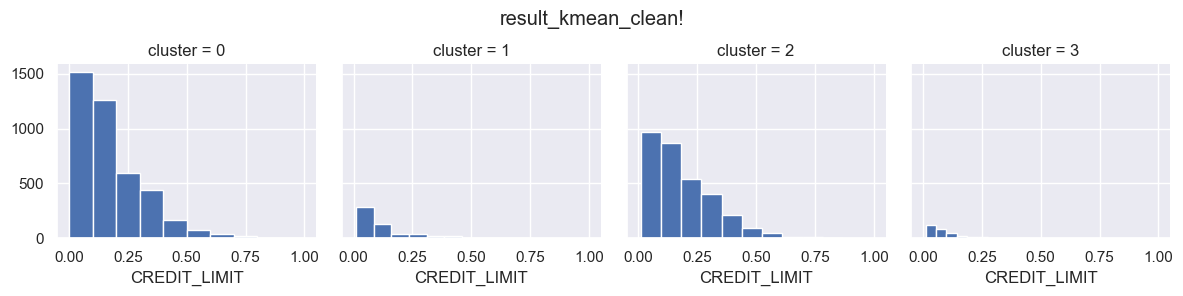

In [104]:
grid= sns.FacetGrid(result_kmean_group, col='cluster')
grid.map(plt.hist, "CREDIT_LIMIT")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_group!')

grid= sns.FacetGrid(result_kmean_clean, col='cluster')
grid.map(plt.hist, "CREDIT_LIMIT")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_clean!')

จากกราฟข้างต้นพบว่าในข้อมูล Credit_Limit ใน cluster 1 ของ result_kmean_group มีข้อมูลเบี่ยงไปทางด้านขวาแต่ใน cluster ที่เหลือมีข้อมูลเบี่ยงไปทางด้านซ้าย ซึ่งสามารถแบ่งแยกได้อย่างชัดเจนมากกว่า ข้อมูล Credit_Limit ของ cluster จาก result_kmean_clean ซี่งอาจจะสามารถบอกได้ว่า บุคคลที่อยู่ใน cluster ส่วนมากเป็นบุคคลที่มีวงเงินซื้อสูงสุดน้อยกว่า cluster อื่นๆ
 

Text(0.5, 0.98, 'result_kmean_clean!')

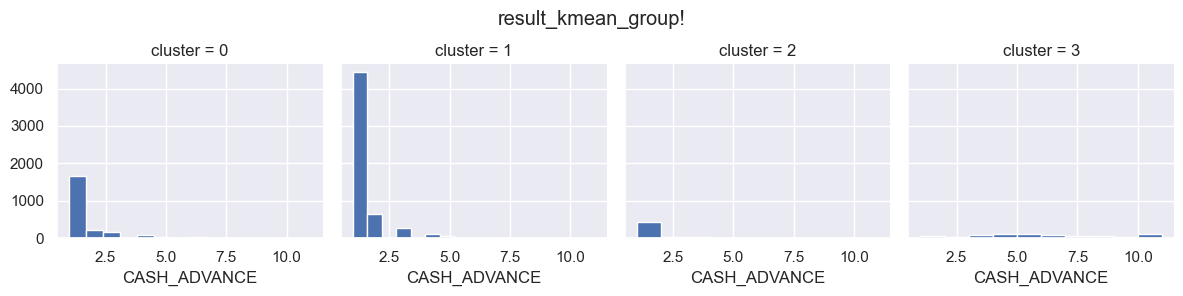

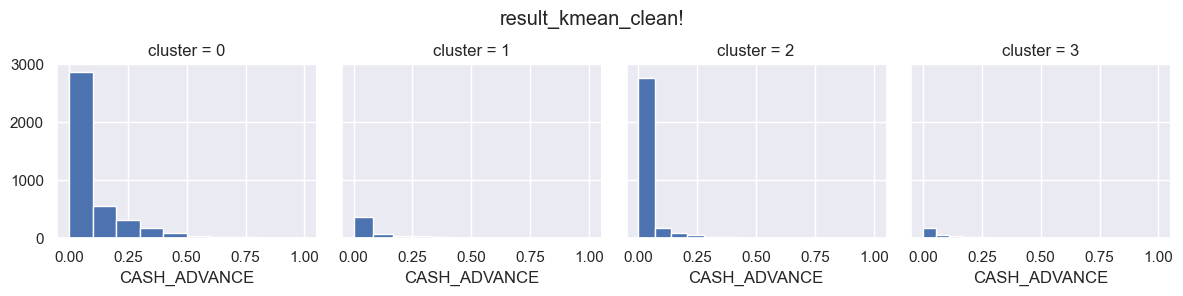

In [105]:
grid= sns.FacetGrid(result_kmean_group, col='cluster')
grid.map(plt.hist, "CASH_ADVANCE")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_group!')

grid= sns.FacetGrid(result_kmean_clean, col='cluster')
grid.map(plt.hist, "CASH_ADVANCE")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_clean!')

จากกราฟข้างต้นพบว่าในข้อมูล Cash Advance ใน cluster 3 ของ result_kmean_group มีข้อมูล Cash advance อยู่ที่ค่อนข้างสูงกว่า cluster อื่นๆ หมายความว่า 

Text(0.5, 0.98, 'result_kmean_clean!')

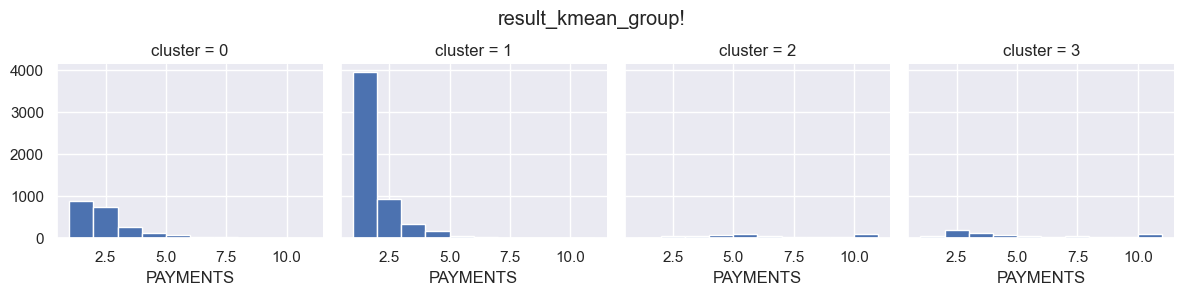

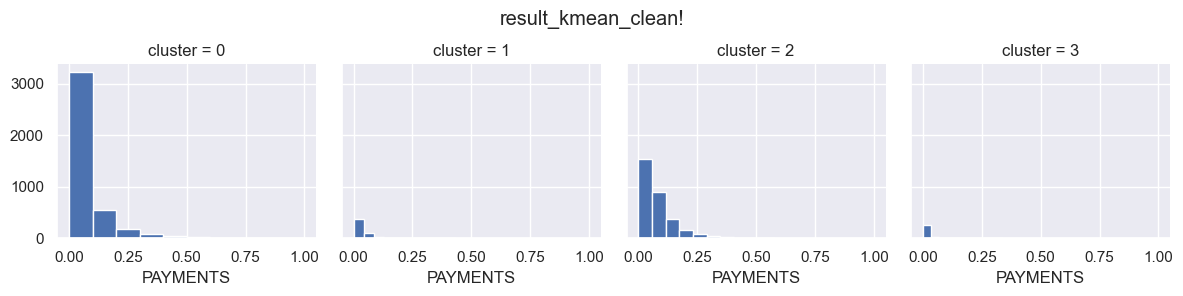

In [106]:
grid= sns.FacetGrid(result_kmean_group, col='cluster')
grid.map(plt.hist, "PAYMENTS")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_group!')

grid= sns.FacetGrid(result_kmean_clean, col='cluster')
grid.map(plt.hist, "PAYMENTS")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_clean!')

จากกราฟข้างต้นพบว่าในข้อมูล Payments ใน cluster 1,3 ของ result_kmean_group มีจำนวนการชำระมากกว่า cluster อื่นๆ


Text(0.5, 0.98, 'result_kmean_clean!')

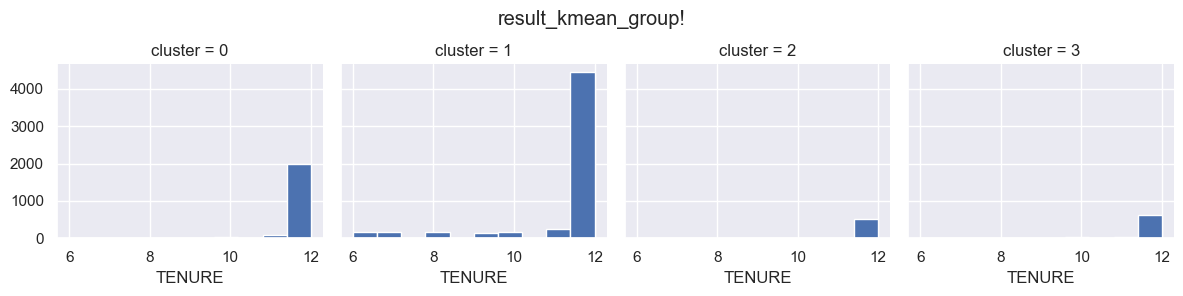

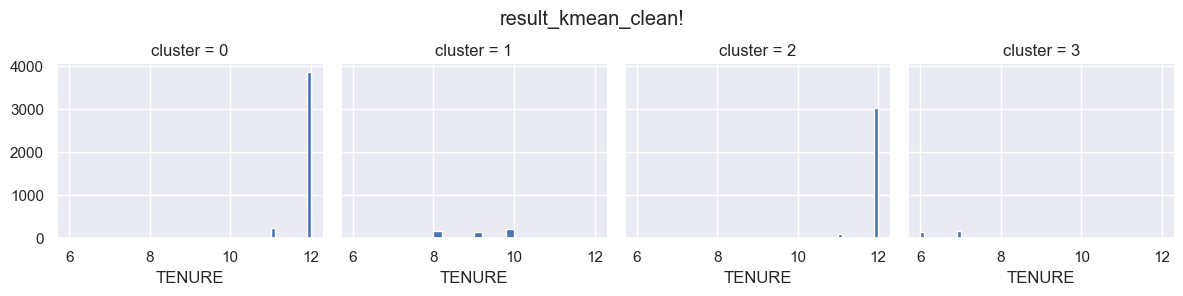

In [107]:
grid= sns.FacetGrid(result_kmean_group, col='cluster')
grid.map(plt.hist, "TENURE")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_group!')

grid= sns.FacetGrid(result_kmean_clean, col='cluster')
grid.map(plt.hist, "TENURE")
grid.fig.subplots_adjust(top=0.8)   
grid.fig.suptitle('result_kmean_clean!')

จากกราฟข้างต้นพบว่าในข้อมูล Tenure ของ result_kmean_group ไม่สามารถบอกอะไรได้มากนัก แต่ในส่วนของ result_kmean_clean ใน cluster 1 มี Tenure อยู่ที่ 6 - 8 cluster 3 อยู่ที่ 9 - 10 และ cluster 0 , 2 จะมี Tenure อยู่ที่ 11 - 12 